In [1]:
# Import libraries

import pandas as pd
import phik
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import phik
from pylab import rcParams

rcParams['figure.figsize'] = 25, 15

# для построения моделей воспользуемся sklearn

import sklearn
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [3]:

pd.set_option('display.float_format', lambda x: '%.3f' % x)  #выключаем scintific notation

# Dataset loading

In [808]:
DF_Adventure = pd.read_csv('')

In [809]:
DF_Sci_Fi = pd.read_csv('')

In [810]:
DF_Fantasy = pd.read_csv()

In [574]:
DF_Adventure = DF_Adventure.drop('good_film_summ', axis=1)

In [812]:
DF_Fantasy

,title_year,gross,budget,marga,marga_coef,imdb_score,director_name,actor_1_name,num_voted_users,movie_facebook_likes,film_class,good_film_summ,year_class
0,2009.000,760505847.000,237000000.000,523505847.000,3.209,7.900,James Cameron,CCH Pounder,886204,33000,1,2,1
1,2007.000,309404152.000,300000000.000,9404152.000,1.031,7.100,Gore Verbinski,Johnny Depp,471220,0,0,4,1
2,2010.000,200807262.000,260000000.000,-59192738.000,0.772,7.800,Nathan Greno,Brad Garrett,294810,29000,0,1,0
3,2009.000,301956980.000,250000000.000,51956980.000,1.208,7.500,David Yates,Alan Rickman,321795,10000,0,2,1
4,2006.000,423032628.000,225000000.000,198032628.000,1.880,7.300,Gore Verbinski,Johnny Depp,522040,5000,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1997.000,203134.000,250000.000,-46866.000,0.813,7.000,Bill Plympton,Charis Michelsen,1428,178,0,1,0
565,1982.000,21000000.000,18000000.000,3000000.000,1.167,6.100,Paul Schrader,Ed Begley Jr.,14193,0,0,3,1
566,1977.000,7000000.000,20000.000,6980000.000,350.000,7.400,David Lynch,Hal Landon Jr.,69831,0,1,2,1
567,2005.000,50000.000,50000.000,0.000,1.000,7.300,Andrew Leman,Dan Novy,6261,0,0,1,0


In [813]:
DF_Adventure['marga_coef'] = DF_Adventure['marga_coef'].apply(lambda x:  1 if x > 2.6 else 0)
DF_Adventure['imdb_score'] = DF_Adventure['imdb_score'].apply(lambda x: 1 if x > 5.5 else 0)

In [815]:
DF_Adventure['year_class'].value_counts(normalize=True)

1   0.833
0   0.167
Name: year_class, dtype: float64

In [814]:
DF_Fantasy['marga_coef'] = DF_Fantasy['marga_coef'].apply(lambda x:  1 if x > 2.6 else 0)
DF_Fantasy['imdb_score'] = DF_Fantasy['imdb_score'].apply(lambda x: 1 if x > 5.5 else 0)

In [638]:

# DF_Fantasy['film_class'] = ((DF_Fantasy['marga_coef'] > 0) & (DF_Fantasy['imdb_score'] > 0)).astype(int)

In [816]:
DF_Fantasy['year_class'].value_counts(normalize=True)

1   0.745
0   0.255
Name: year_class, dtype: float64

# ************************

# Start of Catboost !

In [585]:
# from catboost import CatBoostClassifier

In [951]:
#обучаем модель на датасете DF_Adventure

train, test = train_test_split(DF_Adventure,train_size=0.65,random_state=42,stratify=DF_Adventure['film_class'])

val, test = train_test_split(test,train_size=0.5,random_state=42,stratify=test['film_class'])


In [968]:
# 'title_year', , 'year_class' , 'film_class' 'movie_facebook_likes' ,'num_voted_users' 'good_film_summ' , 'marga_coef'
X = ['title_year', 'gross', 'budget', 'marga', 'imdb_score',
     'director_name', 'actor_1_name', 'movie_facebook_likes' ,'num_voted_users'
     ]

cat_features = ['director_name', 'actor_1_name']

y = ['film_class']


In [969]:

from catboost import Pool

train_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features
                  )

valid_data = Pool(data=val[X],
                  label=val[y],
                  cat_features=cat_features
                  )


In [970]:

params = {'verbose': 100,
          'task_type': 'GPU',
          'random_seed': 42}


In [971]:
# cat_model = CatBoostClassifier(**params)

In [972]:
# cat_model.fit(train_data, eval_set=valid_data)

Learning rate set to 0.074582
0:	learn: 0.5729333	test: 0.5855232	best: 0.5855232 (0)	total: 40ms	remaining: 40s
100:	learn: 0.0246074	test: 0.0896781	best: 0.0892366 (93)	total: 3.95s	remaining: 35.2s
200:	learn: 0.0126290	test: 0.0941573	best: 0.0892366 (93)	total: 7.74s	remaining: 30.8s
300:	learn: 0.0084224	test: 0.1054254	best: 0.0892366 (93)	total: 11.2s	remaining: 26.1s
400:	learn: 0.0058318	test: 0.1083880	best: 0.0892366 (93)	total: 14.7s	remaining: 22s
500:	learn: 0.0045816	test: 0.1105731	best: 0.0892366 (93)	total: 18.2s	remaining: 18.2s
600:	learn: 0.0036145	test: 0.1126555	best: 0.0892366 (93)	total: 21.7s	remaining: 14.4s
700:	learn: 0.0030434	test: 0.1130774	best: 0.0892366 (93)	total: 25.2s	remaining: 10.8s
800:	learn: 0.0026493	test: 0.1143751	best: 0.0892366 (93)	total: 28.7s	remaining: 7.14s
900:	learn: 0.0023320	test: 0.1142573	best: 0.0892366 (93)	total: 32.2s	remaining: 3.54s
999:	learn: 0.0020933	test: 0.1148642	best: 0.0892366 (93)	total: 35.7s	remaining: 0us
b

In [973]:

pred = cat_model.predict(test[X])
print(classification_report(test[y], pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       130
           1       0.86      0.89      0.87        27

    accuracy                           0.96       157
   macro avg       0.92      0.93      0.92       157
weighted avg       0.96      0.96      0.96       157



In [974]:
feature_importances = zip(train[X].columns, cat_model.feature_importances_)
list(feature_importances)

[('title_year', 2.643895220954889),
 ('gross', 6.447079379297015),
 ('budget', 35.90789973837388),
 ('marga', 51.2413801149632),
 ('imdb_score', 2.3894889504497154),
 ('director_name', 0.49540307506122155),
 ('actor_1_name', 0.0),
 ('movie_facebook_likes', 0.10888271699462443),
 ('num_voted_users', 0.765970803905444)]

In [975]:
# тут уже помещаем другой датасет для того, чтобы модельб обученая на первом датасете, созала по нему предикт
pred_v2 = cat_model.predict(DF_Fantasy[X])
print(classification_report(DF_Fantasy[y], pred_v2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       467
           1       0.89      0.92      0.90       102

    accuracy                           0.96       569
   macro avg       0.93      0.95      0.94       569
weighted avg       0.97      0.96      0.97       569



In [976]:

feature_importances = zip(DF_Fantasy[X].columns, cat_model.feature_importances_)
list(feature_importances)


[('title_year', 2.643895220954889),
 ('gross', 6.447079379297015),
 ('budget', 35.90789973837388),
 ('marga', 51.2413801149632),
 ('imdb_score', 2.3894889504497154),
 ('director_name', 0.49540307506122155),
 ('actor_1_name', 0.0),
 ('movie_facebook_likes', 0.10888271699462443),
 ('num_voted_users', 0.765970803905444)]

далее выясняем скоры, при которых будем преобразовывать скоры в классы

In [838]:
DF_Fantasy['score_catboost'] = cat_model.predict_proba(DF_Fantasy[X])[:, 1] #DF_Fantasy


In [839]:

DF_Fantasy['film_class_catboost_thr_05'] = (DF_Fantasy['score_catboost'] > 0.5).astype(int)


In [840]:

f1_score(DF_Fantasy['film_class'], DF_Fantasy['film_class_catboost_thr_05'])


0.9117647058823528

In [841]:

thrs_DF_Fantasy = []
thrs_DF_Fantasy = [1] + list(DF_Fantasy['score_catboost'].unique())


In [842]:

cat_result = []
for thr in thrs_DF_Fantasy:
    DF_Fantasy['y_pred_score_catboost'] = (DF_Fantasy['score_catboost'] > thr) * 1
    cat_result.append((thr, f1_score(DF_Fantasy['film_class'], DF_Fantasy['y_pred_score_catboost'])))


In [843]:

t_DF_Fantasy = pd.DataFrame()


In [844]:

t_DF_Fantasy = pd.DataFrame(cat_result, columns=['thr', 'f1'])


In [846]:

t_DF_Fantasy[t_DF_Fantasy['f1'] == t_DF_Fantasy['f1'].max()]


,thr,f1
418,0.946,0.948


In [847]:

DF_Fantasy['y_pred_best_class_catboost'] = (DF_Fantasy['score_catboost'] > 0.946).astype(int)


In [848]:
f1_score(DF_Fantasy['film_class'], DF_Fantasy['y_pred_best_class_catboost'])


0.9484536082474228

In [849]:
f1_score(DF_Fantasy['film_class'], DF_Fantasy['film_class_catboost_thr_05'])

0.9117647058823528

In [850]:
DF_Fantasy['film_class'].value_counts(normalize=True)

0   0.821
1   0.179
Name: film_class, dtype: float64

In [851]:
DF_Fantasy['y_pred_best_class_catboost'].value_counts(normalize=True)

0   0.838
1   0.162
Name: y_pred_best_class_catboost, dtype: float64

In [852]:
DF_Fantasy['film_class_catboost_thr_05'].value_counts(normalize=True)

0   0.821
1   0.179
Name: film_class_catboost_thr_05, dtype: float64

# ROC

In [853]:
from catboost.utils import get_roc_curve

In [854]:
test_data = Pool(data=DF_Fantasy[X],
                 label=DF_Fantasy[y],
                 cat_features=cat_features
                 )

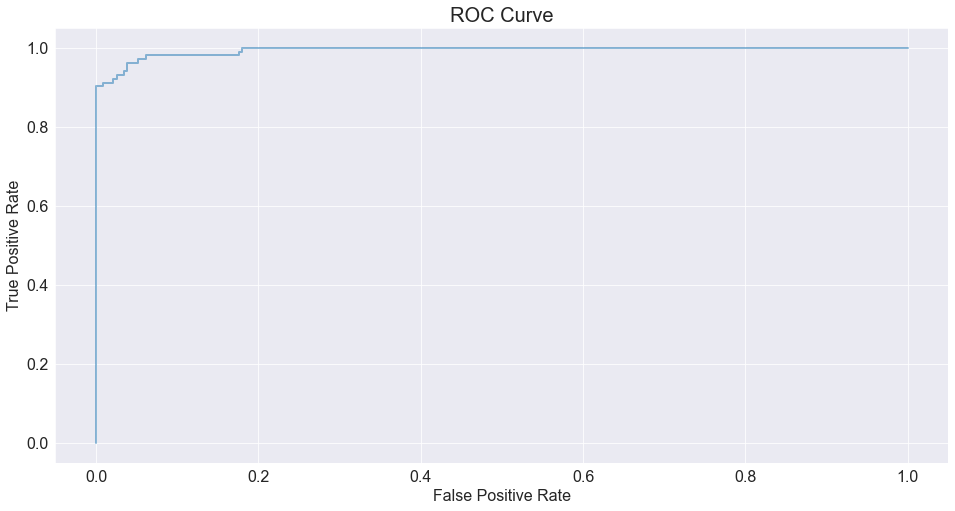

In [855]:

get_roc_curve(cat_model, test_data, plot=True);

In [856]:
print('ROC-AUC', round(roc_auc_score(DF_Fantasy['film_class'],DF_Fantasy['y_pred_best_class_catboost']),3))

ROC-AUC 0.951


In [857]:
roc_params = {'verbose': 100,
          'eval_metric': 'AUC',
          'random_seed': 42}

In [858]:
roc_model = CatBoostClassifier(**roc_params)

In [859]:
roc_model.fit(train_data, eval_set=valid_data)

Learning rate set to 0.0277
0:	test: 0.9384615	best: 0.9384615 (0)	total: 12.7ms	remaining: 12.7s
100:	test: 0.9902367	best: 0.9902367 (92)	total: 2.61s	remaining: 23.3s
200:	test: 0.9928994	best: 0.9928994 (131)	total: 4.91s	remaining: 19.5s
300:	test: 0.9934911	best: 0.9934911 (252)	total: 7.38s	remaining: 17.1s
400:	test: 0.9946746	best: 0.9946746 (375)	total: 9.61s	remaining: 14.4s
500:	test: 0.9949704	best: 0.9949704 (481)	total: 11.8s	remaining: 11.7s
600:	test: 0.9949704	best: 0.9952663 (586)	total: 13.9s	remaining: 9.21s
700:	test: 0.9949704	best: 0.9952663 (586)	total: 16.1s	remaining: 6.85s
800:	test: 0.9949704	best: 0.9952663 (586)	total: 18.3s	remaining: 4.56s
900:	test: 0.9949704	best: 0.9952663 (586)	total: 20.5s	remaining: 2.25s
999:	test: 0.9949704	best: 0.9952663 (586)	total: 22.8s	remaining: 0us

bestTest = 0.9952662722
bestIteration = 586

Shrink model to first 587 iterations.


In [860]:
roc_pred = roc_model.predict(DF_Fantasy[X])
print(classification_report(DF_Fantasy[y], roc_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       467
           1       0.88      0.94      0.91       102

    accuracy                           0.97       569
   macro avg       0.93      0.96      0.94       569
weighted avg       0.97      0.97      0.97       569



In [861]:
DF_Fantasy['score_catboost_roc_model'] = roc_model.predict_proba(DF_Fantasy[X])[:,1]

In [862]:
thrs_roc = []

In [863]:

thrs_roc = [1] + list(DF_Fantasy['score_catboost_roc_model'].unique())

In [864]:

roc_result = []
for thr in thrs_roc:
    DF_Fantasy['y_pred_score_catboost_roc_model'] = (DF_Fantasy['score_catboost_roc_model'] > thr) * 1
    roc_result.append((thr,
                   f1_score(DF_Fantasy['film_class'], DF_Fantasy['y_pred_score_catboost_roc_model'])))


In [865]:

catboost_roc_model = pd.DataFrame()

In [866]:
catboost_roc_model = pd.DataFrame(roc_result, columns=['thr', 'f1'])

In [867]:

catboost_roc_model[catboost_roc_model['f1'] == catboost_roc_model['f1'].max()]

,thr,f1
514,0.621,0.925


In [868]:
DF_Fantasy['y_clas_catboost_roc_model'] = (DF_Fantasy['score_catboost_roc_model'] > 0.621).astype(int)

In [869]:

f1_score(DF_Fantasy['film_class'], DF_Fantasy['y_clas_catboost_roc_model'])

0.9253731343283583

In [870]:
DF_Fantasy['y_clas_catboost_roc_model'].value_counts(normalize=True)

0   0.826
1   0.174
Name: y_clas_catboost_roc_model, dtype: float64

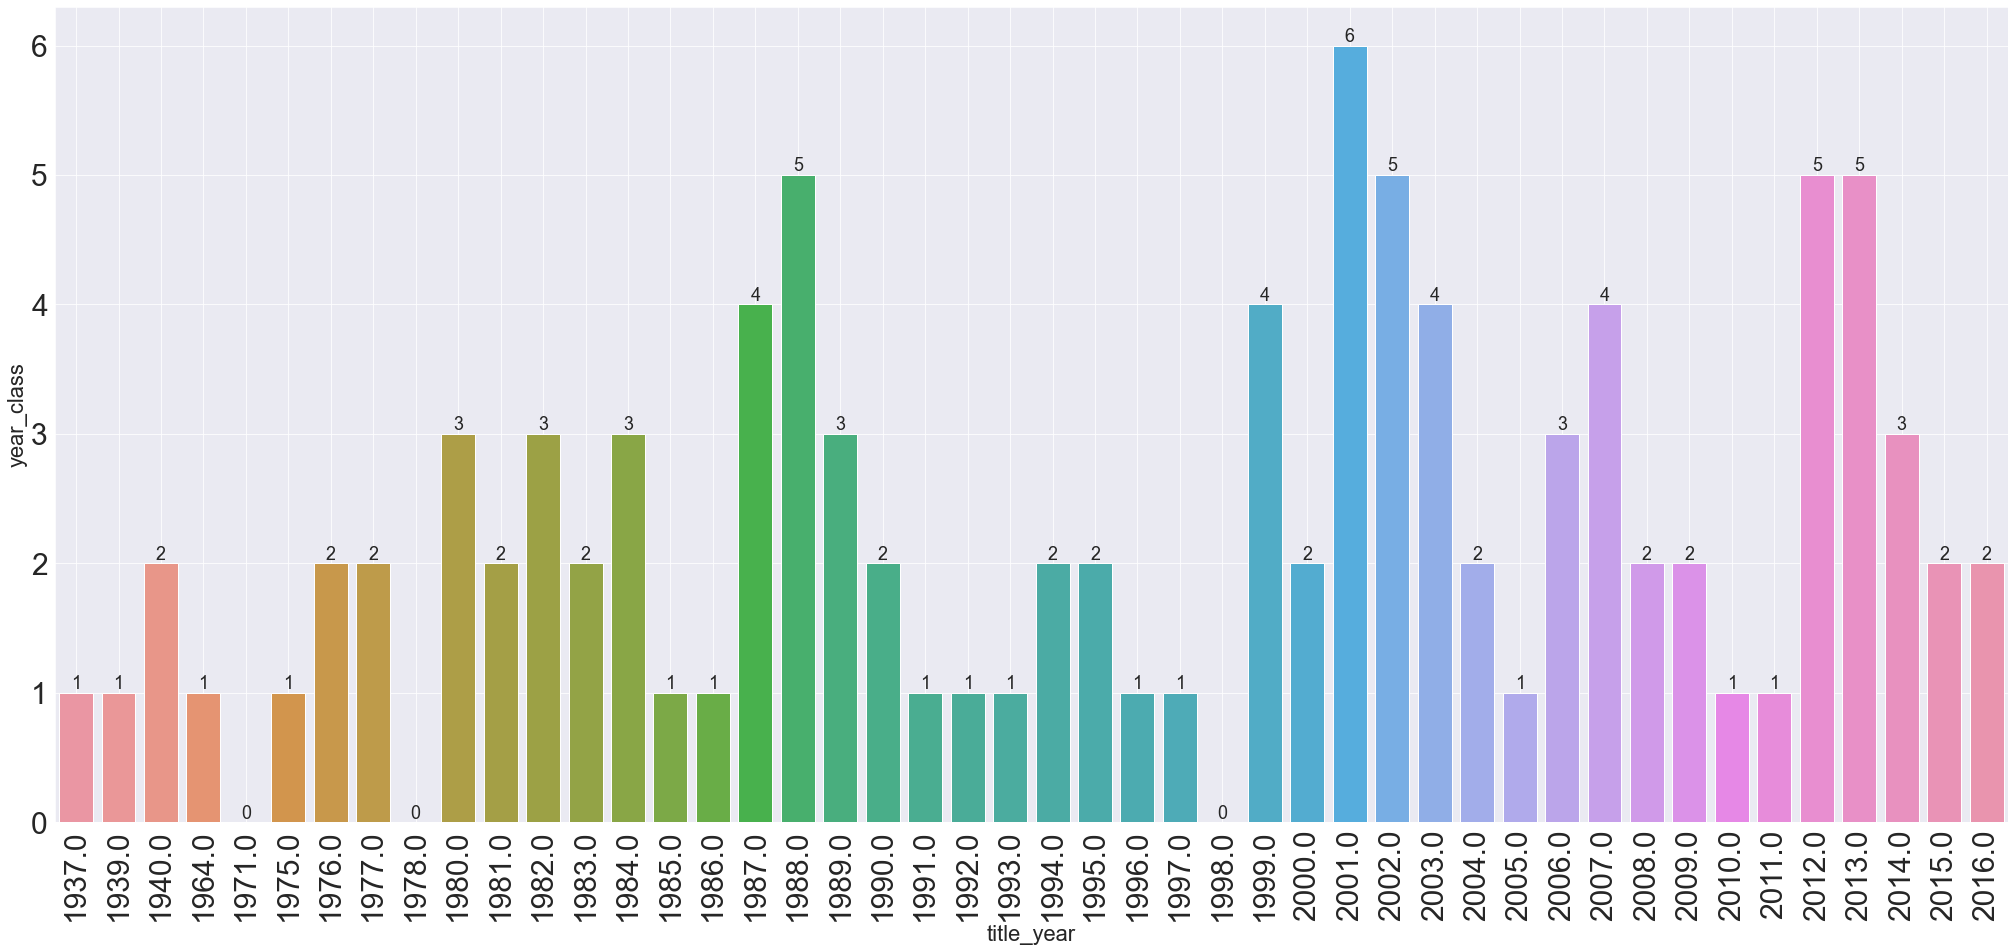

In [871]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='good_film_summ', data=DF_Fantasy)
plt.grid(True)
# chart.set_title(f'{ganr}')
chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
# plt.legend(DF_Adventure['good_film_summ'], fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

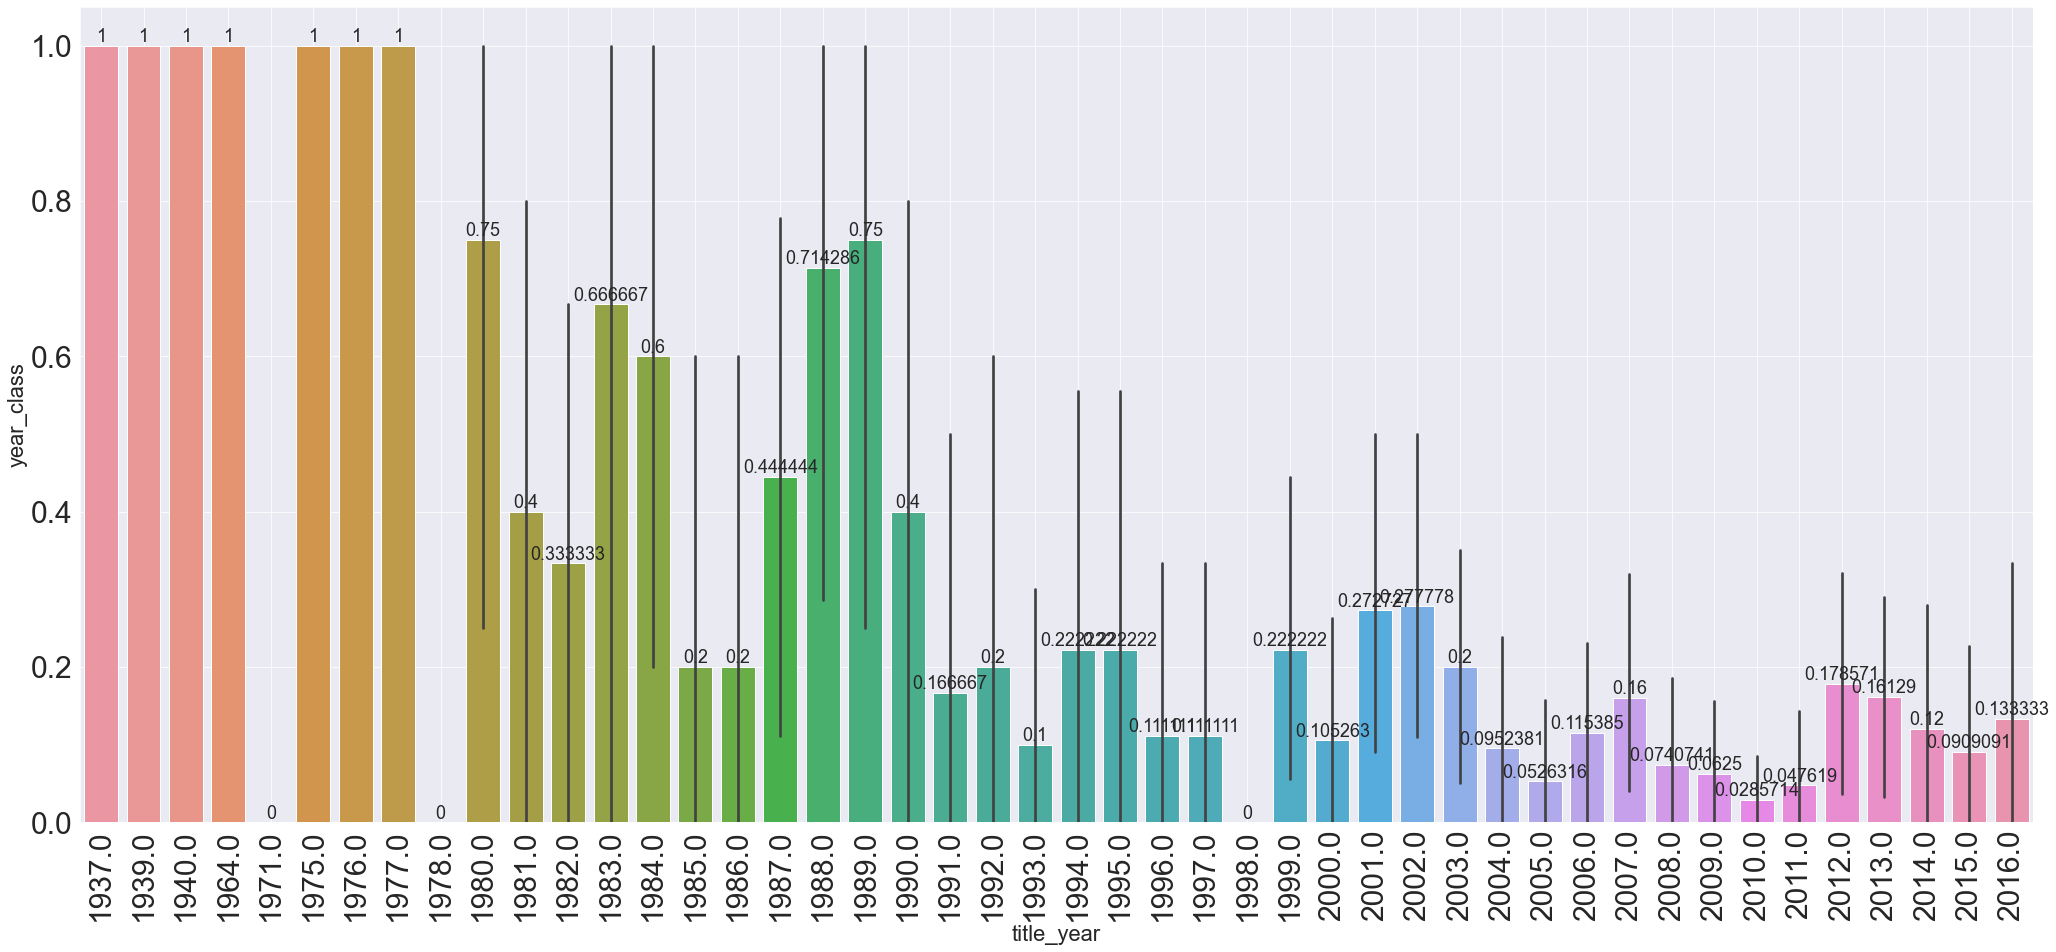

In [872]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='film_class', data=DF_Fantasy)
plt.grid(True)
# chart.set_title(f'{ganr}')
chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
# plt.legend(DF_Adventure['good_film_summ'], fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

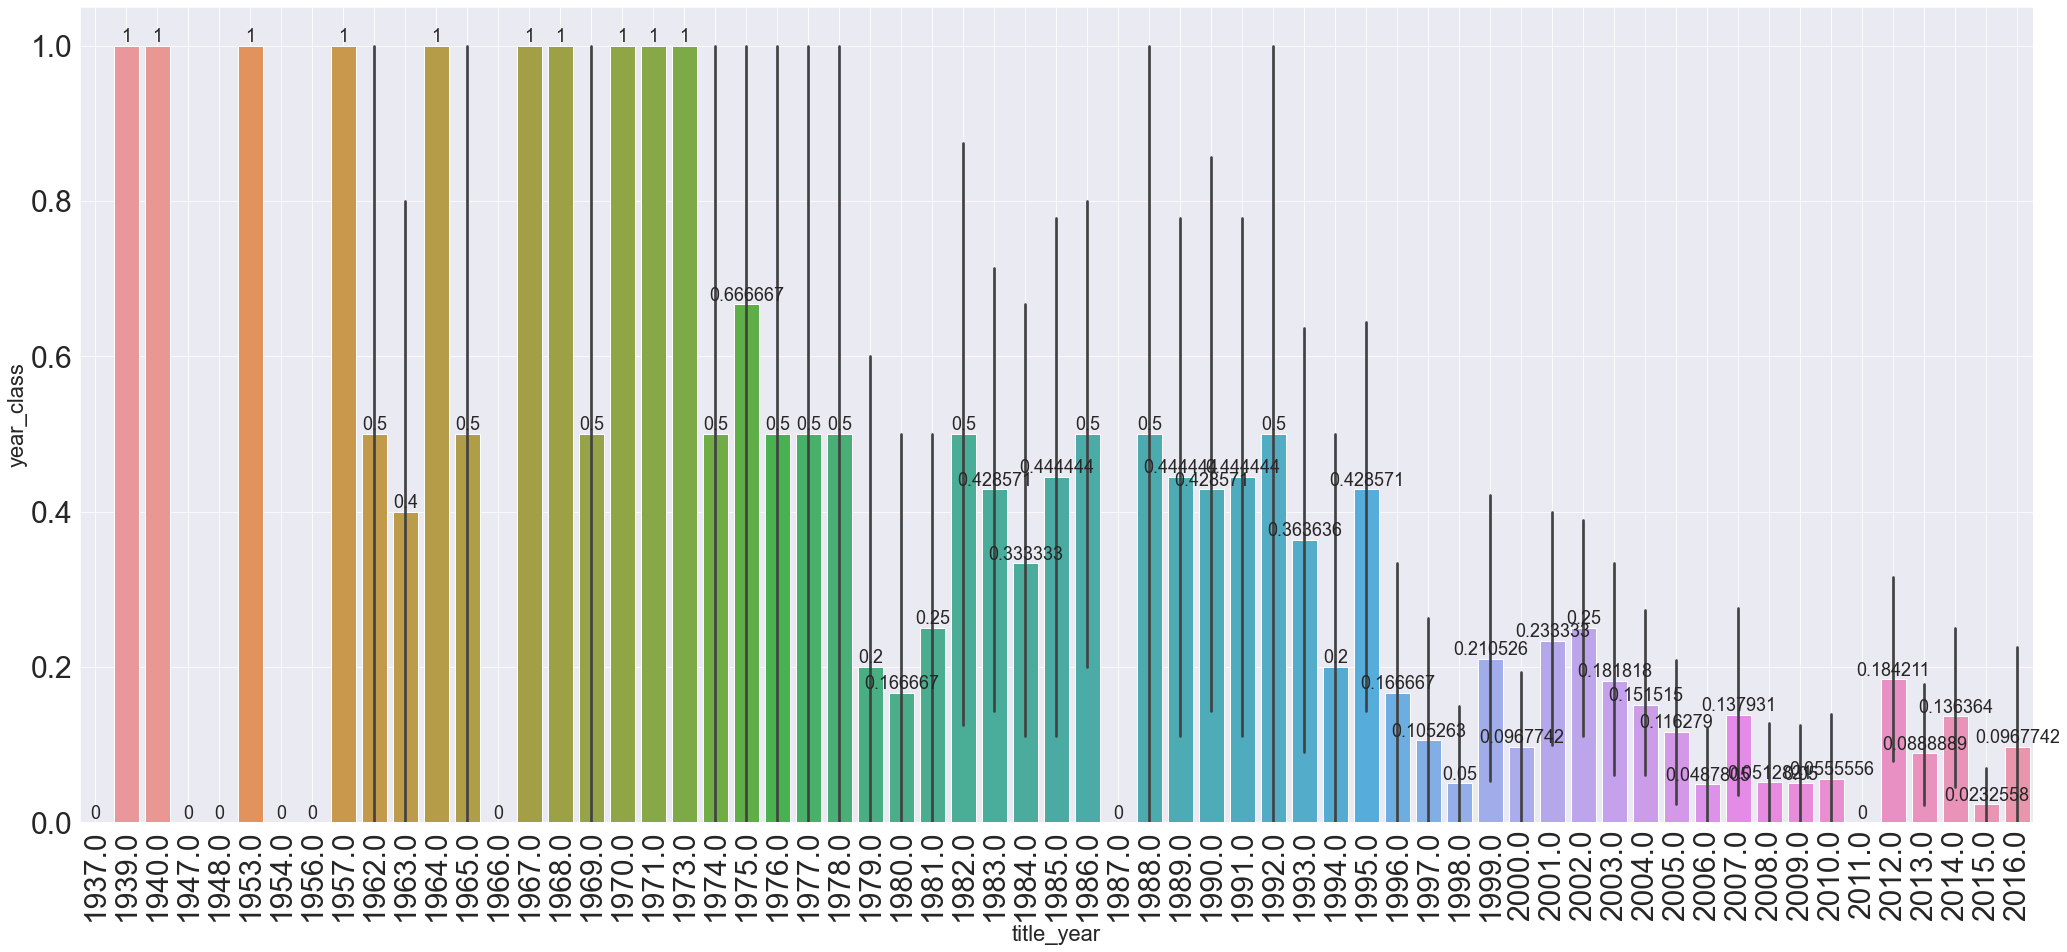

In [873]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='film_class', data=DF_Adventure)
plt.grid(True)
# chart.set_title(f'{ganr}')
chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
# plt.legend(DF_Adventure['good_film_summ'], fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

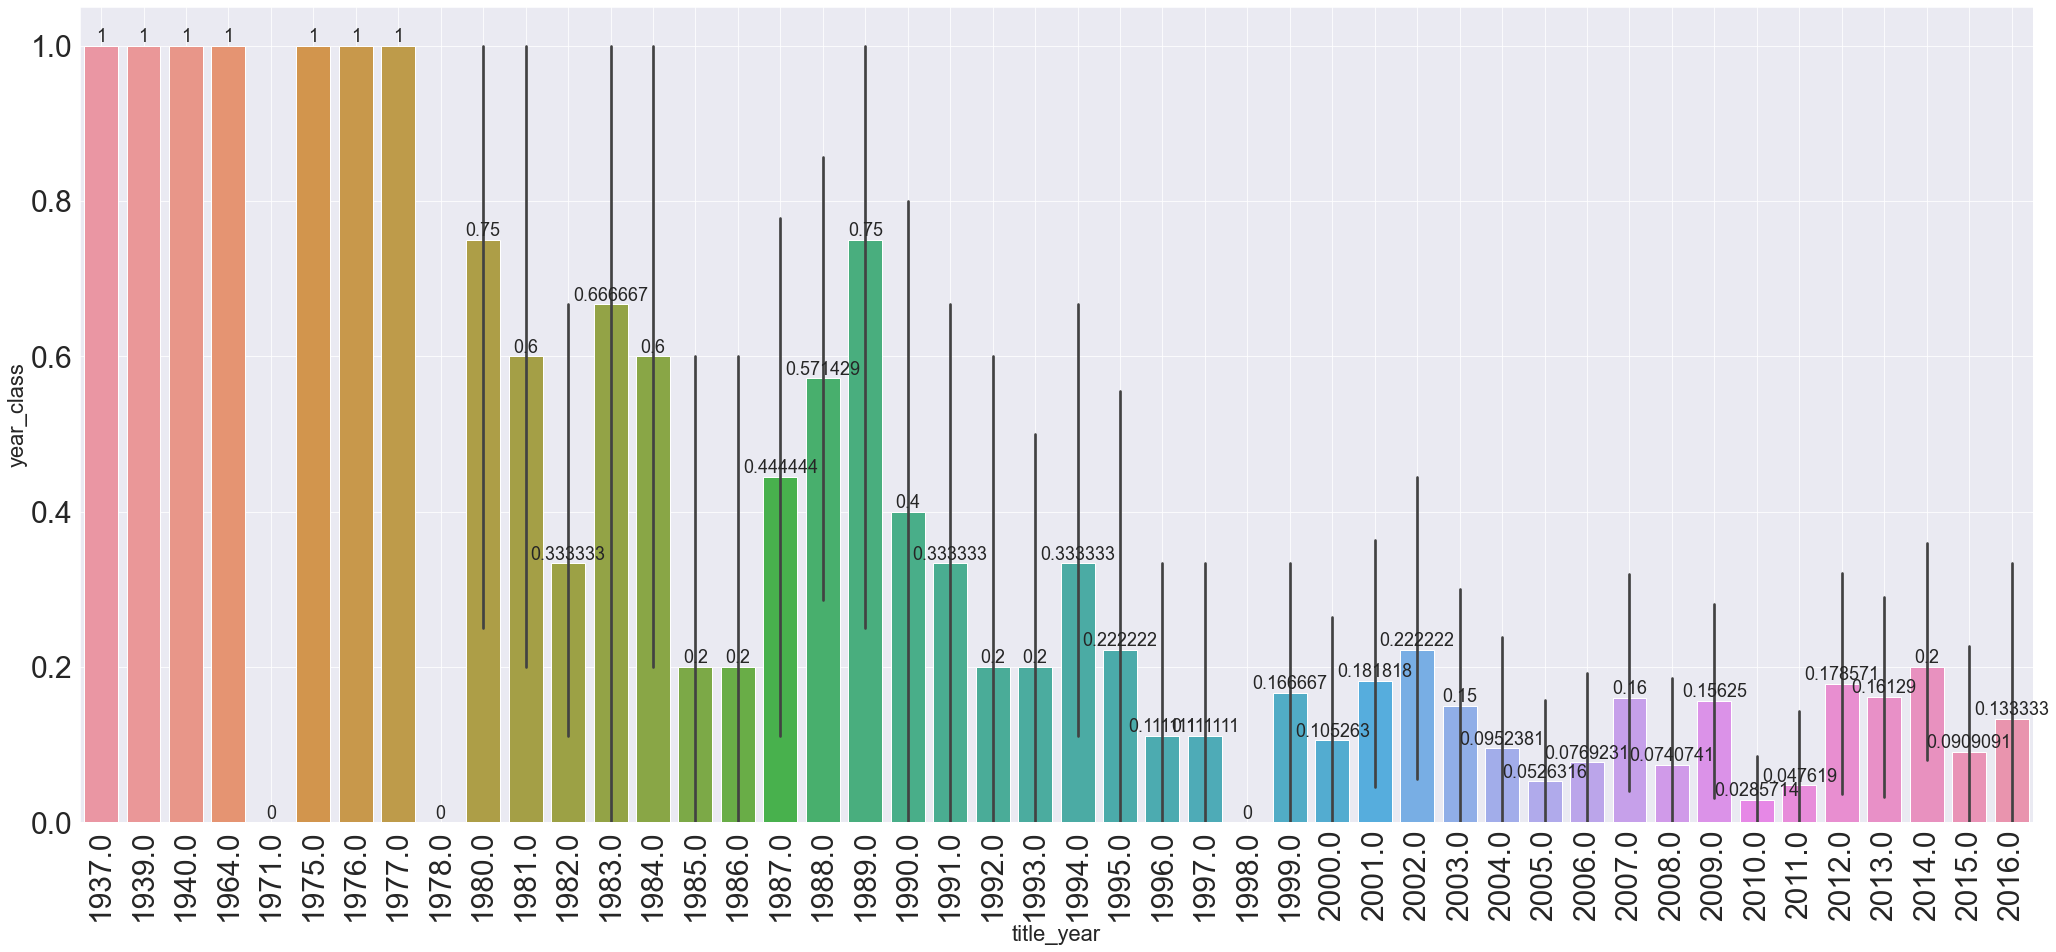

In [797]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='y_clas_catboost_roc_model', data=DF_Fantasy)
plt.grid(True)
# chart.set_title(f'{ganr}')
chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
# plt.legend(DF_Adventure['good_film_summ'], fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

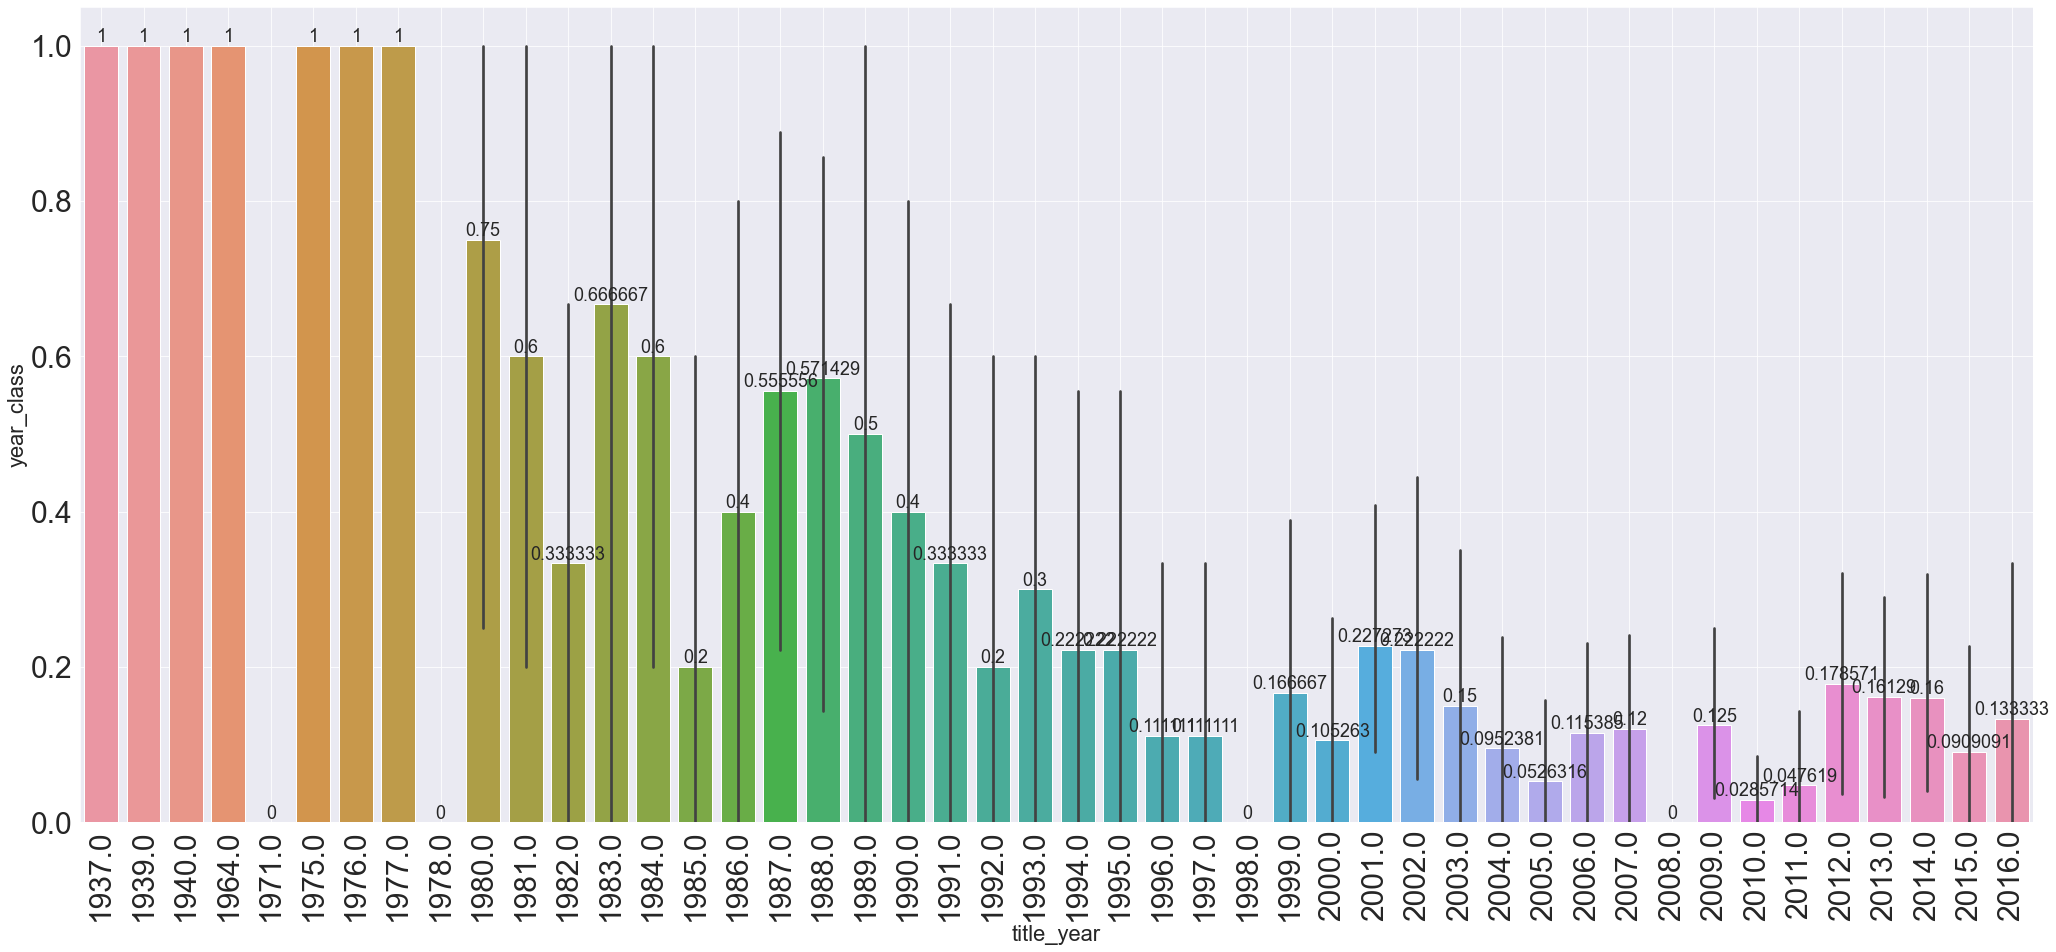

In [874]:
plt.figure(figsize=(35, 15))
chart = sns.barplot(x='title_year', y='film_class_catboost_thr_05', data=DF_Fantasy)
plt.grid(True)
# chart.set_title(f'{ganr}')
chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
# plt.legend(DF_Adventure['good_film_summ'], fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [879]:

film_class_sum_cat = DF_Fantasy.reset_index().groupby('title_year')['y_clas_catboost_roc_model'].agg(['sum'])
DF_Fantasy = pd.merge(DF_Fantasy, film_class_sum_cat, how='left', on='title_year')
DF_Fantasy.rename(columns={'sum': 'good_film_summ_catboost_roc'}, inplace=True)

DF_Fantasy['year_class_catboost_roc'] = (DF_Fantasy['good_film_summ_catboost_roc'] > 1).astype(int)

In [883]:
DF_Fantasy['year_class_catboost_roc']

,title_year,gross,budget,marga,marga_coef,imdb_score,director_name,actor_1_name,num_voted_users,movie_facebook_likes,...,y_pred_best_class_catboost,score_catboost_roc_model,y_pred_score_catboost_roc_model,y_clas_catboost_roc_model,good_film_summ_catboost_thr_05,year_class_catboost_thr_05,good_film_summ_best_class_catboost,year_best_class_catboost,good_film_summ_catboost_roc,year_class_catboost_roc
0,2009.000,760505847.000,237000000.000,523505847.000,1,1,James Cameron,CCH Pounder,886204,33000,...,1,0.991,1,1,4,1,2,1,4,1
1,2007.000,309404152.000,300000000.000,9404152.000,0,1,Gore Verbinski,Johnny Depp,471220,0,...,0,0.000,0,0,3,1,3,1,3,1
2,2010.000,200807262.000,260000000.000,-59192738.000,0,1,Nathan Greno,Brad Garrett,294810,29000,...,0,0.000,0,0,1,0,1,0,1,0
3,2009.000,301956980.000,250000000.000,51956980.000,0,1,David Yates,Alan Rickman,321795,10000,...,0,0.001,0,0,4,1,2,1,4,1
4,2006.000,423032628.000,225000000.000,198032628.000,0,1,Gore Verbinski,Johnny Depp,522040,5000,...,0,0.002,1,0,3,1,2,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1997.000,203134.000,250000.000,-46866.000,0,1,Bill Plympton,Charis Michelsen,1428,178,...,0,0.002,0,0,1,0,1,0,1,0
565,1982.000,21000000.000,18000000.000,3000000.000,0,1,Paul Schrader,Ed Begley Jr.,14193,0,...,0,0.002,0,0,3,1,3,1,3,1
566,1977.000,7000000.000,20000.000,6980000.000,1,1,David Lynch,Hal Landon Jr.,69831,0,...,1,0.995,1,1,2,1,2,1,2,1
567,2005.000,50000.000,50000.000,0.000,0,1,Andrew Leman,Dan Novy,6261,0,...,0,0.001,0,0,1,0,1,0,1,0


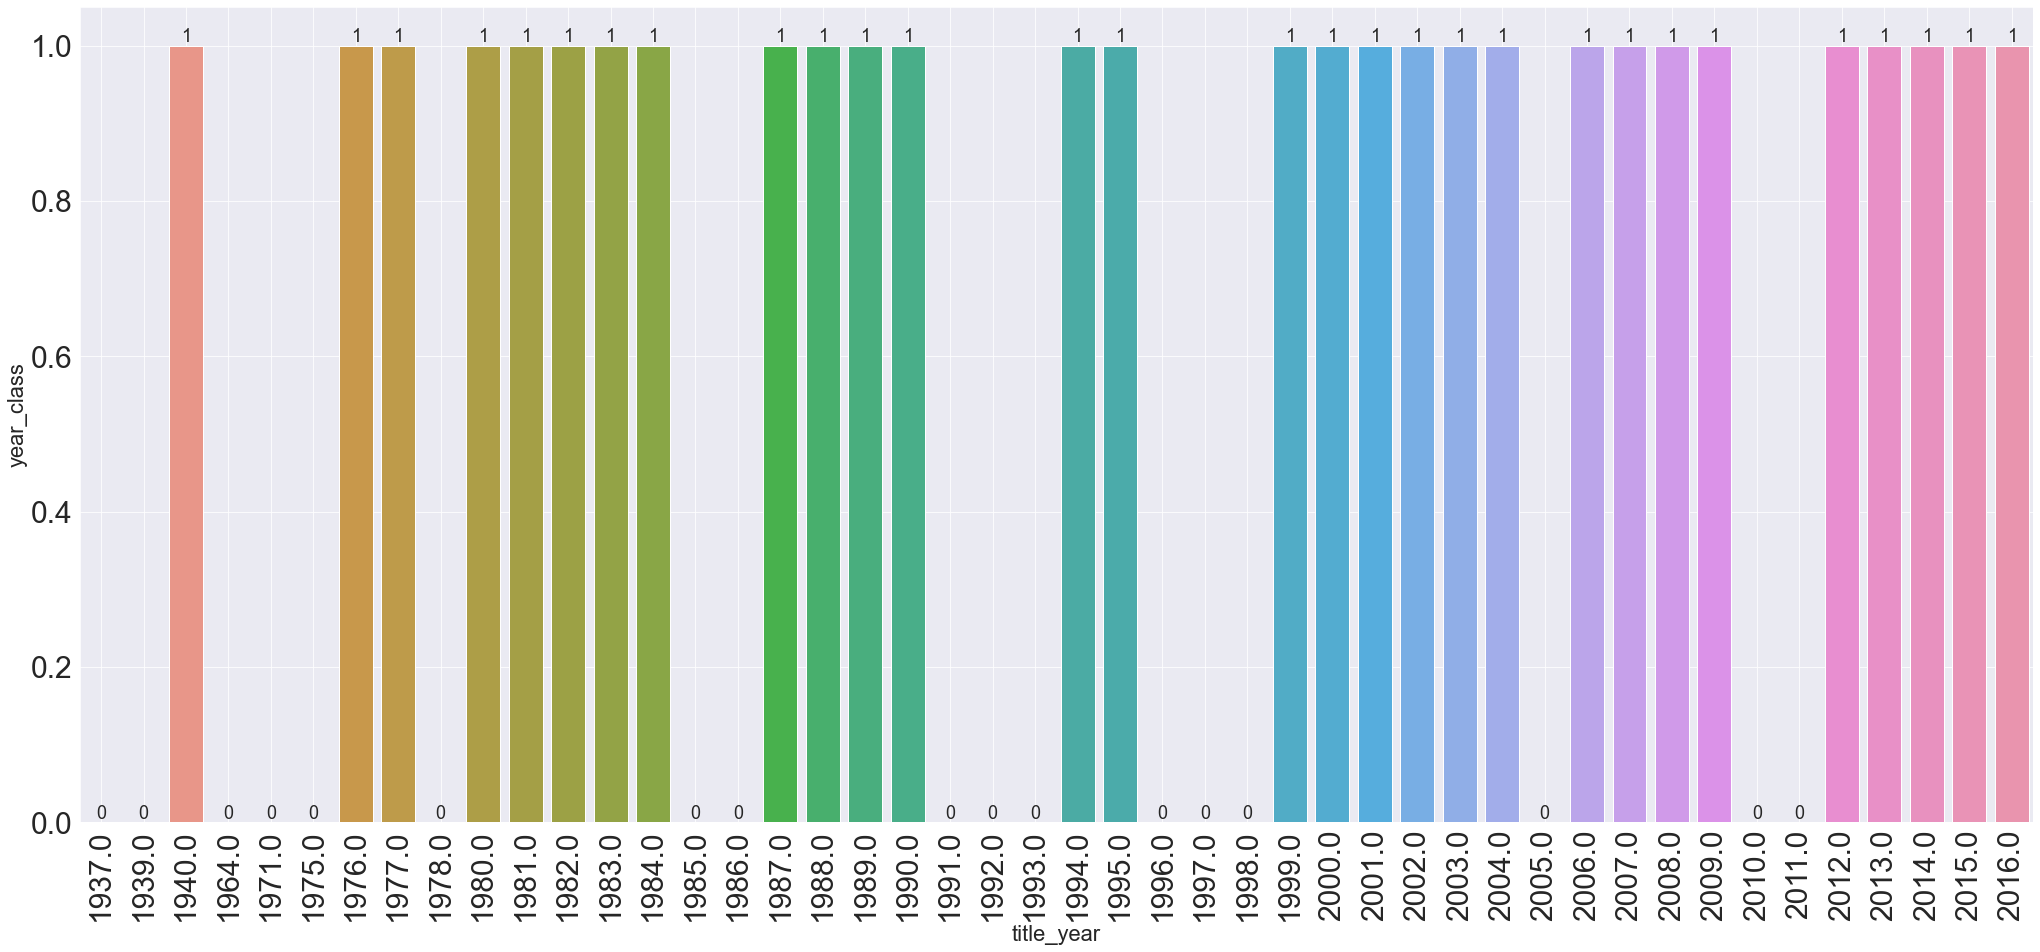

In [880]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='year_class', data=DF_Fantasy)
plt.grid(True)
# chart.set_title(f'{ganr}')
chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
# plt.legend(DF_Adventure['good_film_summ'], fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

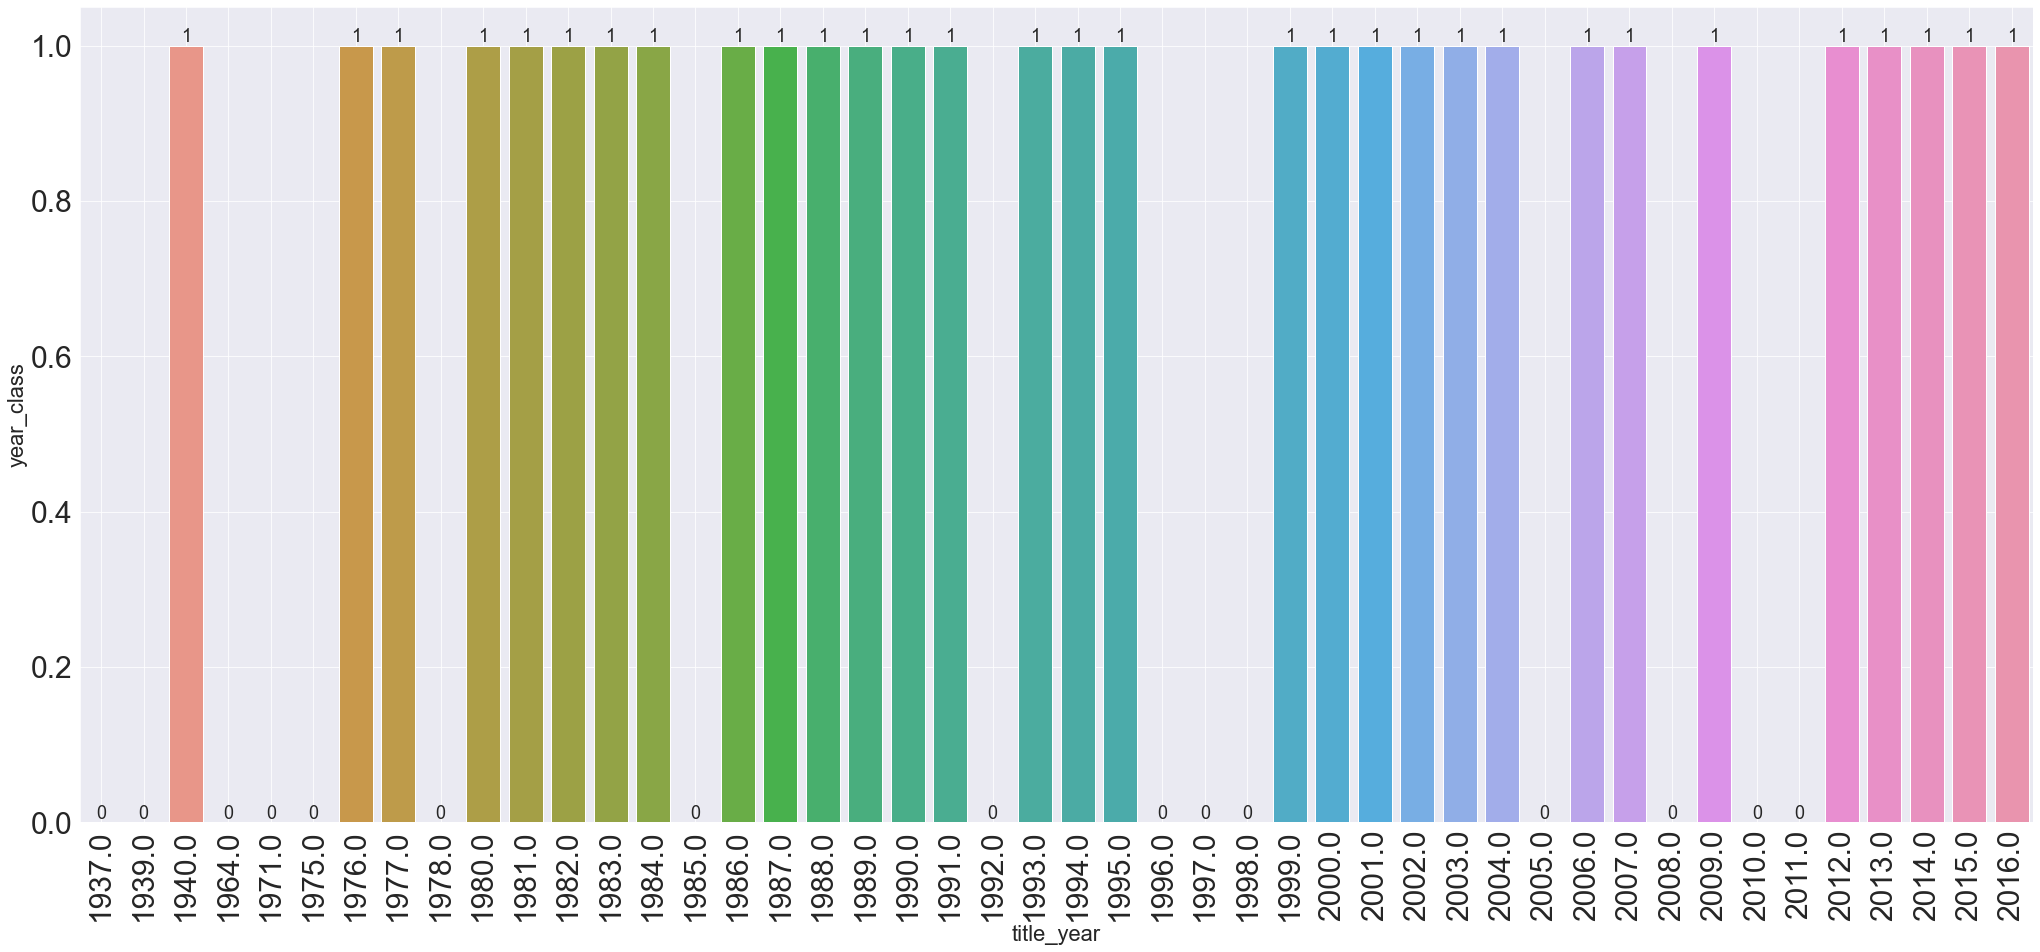

In [881]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='year_class_catboost_thr_05', data=DF_Fantasy)
plt.grid(True)
# chart.set_title(f'{ganr}')
chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
# plt.legend(DF_Adventure['good_film_summ'], fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

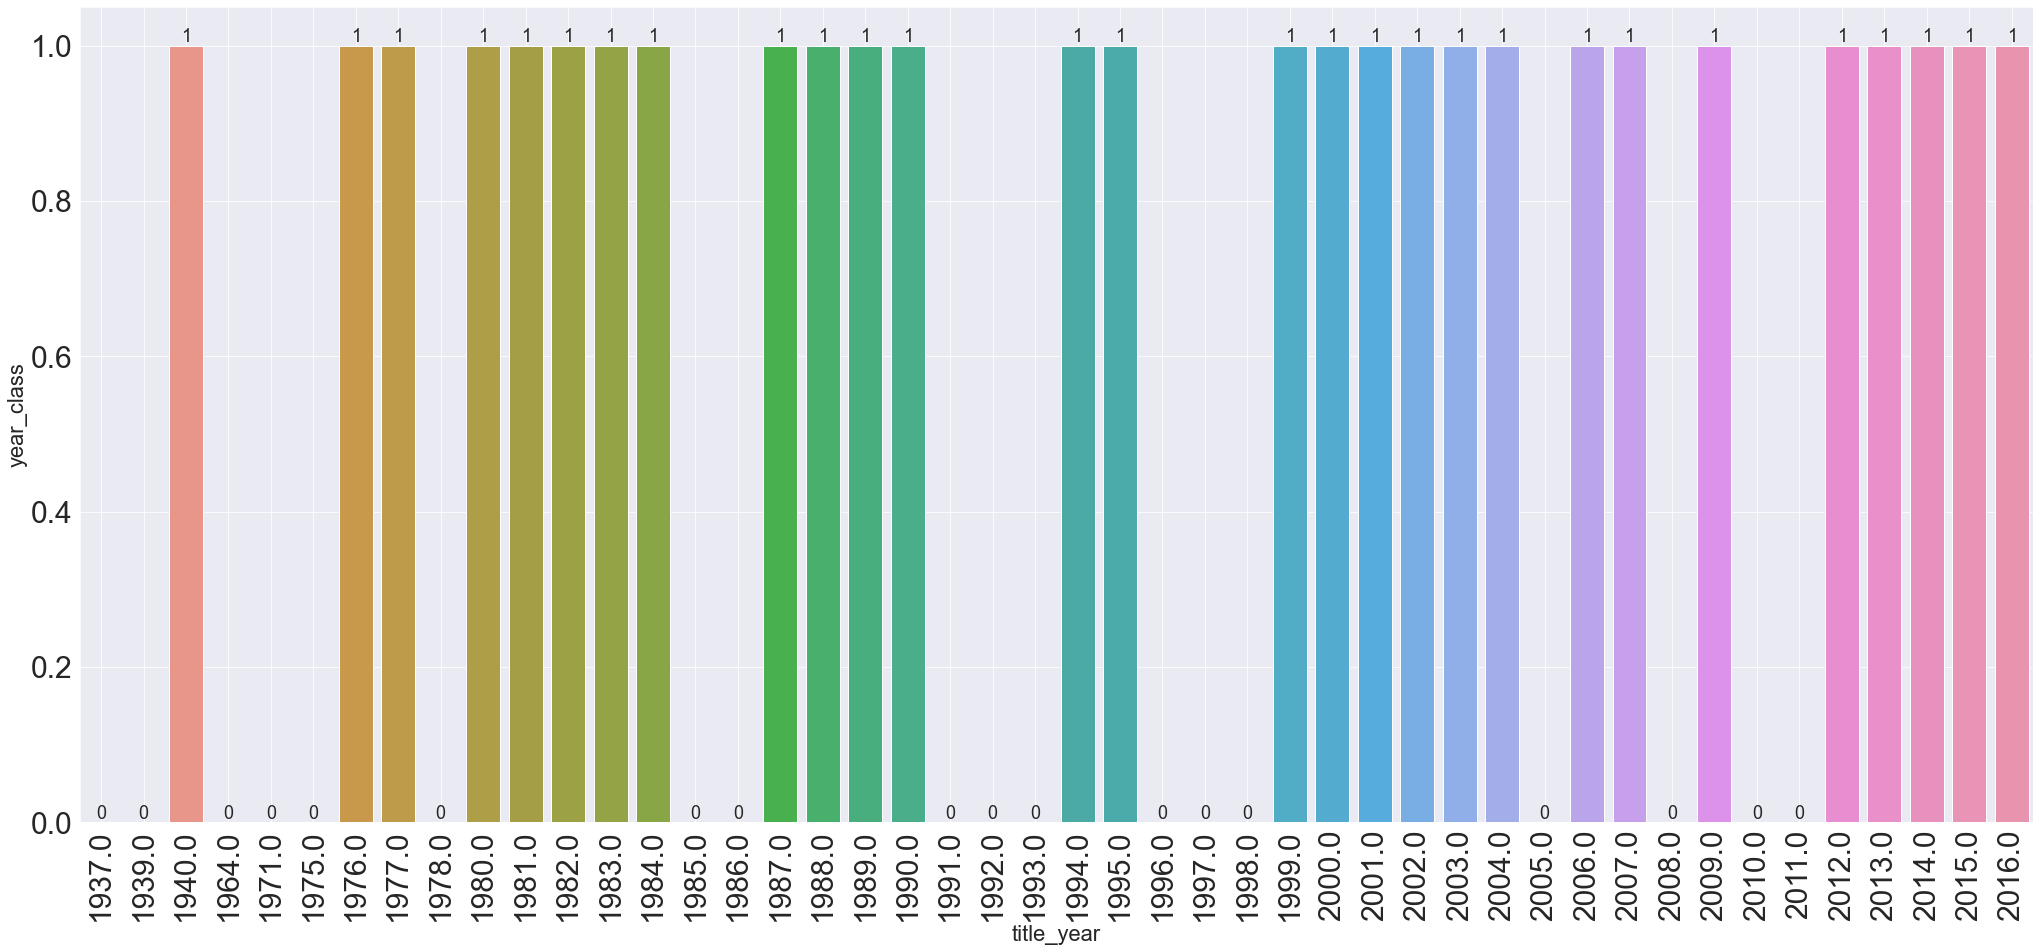

In [884]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='year_best_class_catboost', data=DF_Fantasy)
plt.grid(True)
# chart.set_title(f'{ganr}')
chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
# plt.legend(DF_Adventure['good_film_summ'], fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

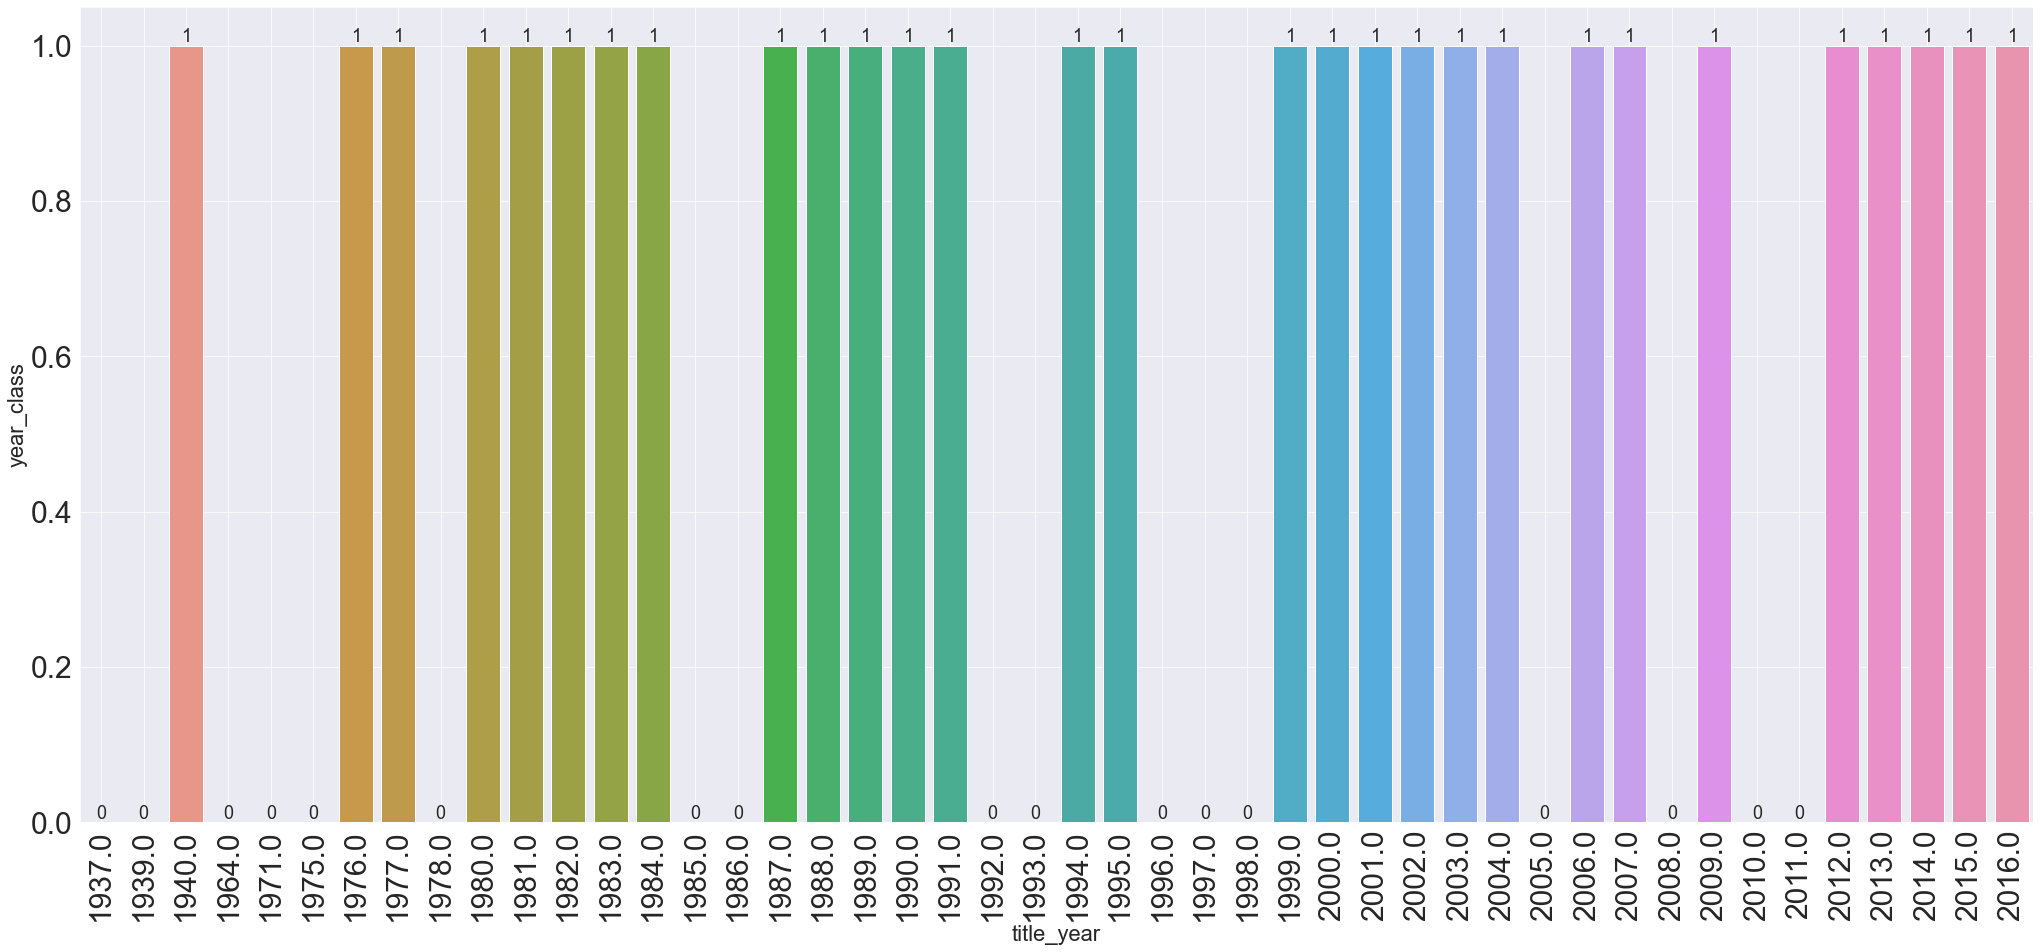

In [885]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='year_class_catboost_roc', data=DF_Fantasy)
plt.grid(True)
# chart.set_title(f'{ganr}')
chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
# plt.legend(DF_Adventure['good_film_summ'], fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

тут проделаем всё то же с датасетом по фантастике. модель уже обучена

In [889]:
DF_Sci_Fi['marga_coef'] = DF_Sci_Fi['marga_coef'].apply(lambda x:  1 if x > 2.6 else 0)
DF_Sci_Fi['imdb_score'] = DF_Sci_Fi['imdb_score'].apply(lambda x: 1 if x > 5.5 else 0)

In [890]:
pred_v3 = cat_model.predict(DF_Sci_Fi[X])
print(classification_report(DF_Sci_Fi[y], pred_v3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       468
           1       0.96      0.93      0.94        91

    accuracy                           0.98       559
   macro avg       0.97      0.96      0.97       559
weighted avg       0.98      0.98      0.98       559



In [891]:

feature_importances_DF_Sci_Fi = zip(DF_Sci_Fi[X].columns, cat_model.feature_importances_)
list(feature_importances_DF_Sci_Fi)


[('title_year', 1.52968540508254),
 ('gross', 4.7009788263035475),
 ('budget', 15.343935464644806),
 ('marga', 25.438257455483832),
 ('marga_coef', 45.91444199822168),
 ('imdb_score', 3.9518444680199845),
 ('director_name', 0.7591299512302709),
 ('actor_1_name', 0.10869183280025055),
 ('movie_facebook_likes', 0.5810817422070047),
 ('num_voted_users', 1.6719528560061085)]

In [892]:
DF_Sci_Fi['score_catboost'] = cat_model.predict_proba(DF_Sci_Fi[X])[:, 1]

In [893]:

DF_Sci_Fi['film_class_catboost_thr_05'] = (DF_Sci_Fi['score_catboost'] > 0.5).astype(int)

In [894]:

f1_score(DF_Sci_Fi['film_class'], DF_Sci_Fi['film_class_catboost_thr_05'])


0.9444444444444444

In [895]:

thrs_DF_Sci_Fi = []
thrs_DF_Sci_Fi = [1] + list(DF_Sci_Fi['score_catboost'].unique())


In [896]:

cat_result = []
for thr in thrs_DF_Sci_Fi:
    DF_Sci_Fi['y_pred_score_catboost'] = (DF_Sci_Fi['score_catboost'] > thr) * 1
    cat_result.append((thr, f1_score(DF_Sci_Fi['film_class'], DF_Sci_Fi['y_pred_score_catboost'])))


In [897]:

t_DF_Sci_Fi = pd.DataFrame()

In [898]:

t_DF_Sci_Fi = pd.DataFrame(cat_result, columns=['thr', 'f1'])

In [899]:

t_DF_Sci_Fi[t_DF_Sci_Fi['f1'] == t_DF_Sci_Fi['f1'].max()]

,thr,f1
212,0.387,0.950


In [900]:
DF_Sci_Fi['y_pred_best_class_catboost'] = (DF_Sci_Fi['score_catboost'] > 0.387).astype(int)

In [901]:

f1_score(DF_Sci_Fi['film_class'], DF_Sci_Fi['y_pred_best_class_catboost'])

0.945054945054945

In [902]:

f1_score(DF_Sci_Fi['film_class'], DF_Sci_Fi['film_class_catboost_thr_05'])

0.9444444444444444

In [903]:
DF_Sci_Fi['film_class'].value_counts(normalize=True)

0   0.837
1   0.163
Name: film_class, dtype: float64

In [904]:

DF_Sci_Fi['y_pred_best_class_catboost'].value_counts(normalize=True)

0   0.837
1   0.163
Name: y_pred_best_class_catboost, dtype: float64

In [905]:

DF_Sci_Fi['film_class_catboost_thr_05'].value_counts(normalize=True)

0   0.841
1   0.159
Name: film_class_catboost_thr_05, dtype: float64

# ROC

In [906]:
test_data = Pool(data=DF_Sci_Fi[X],
                 label=DF_Sci_Fi[y],
                 cat_features=cat_features
                 )

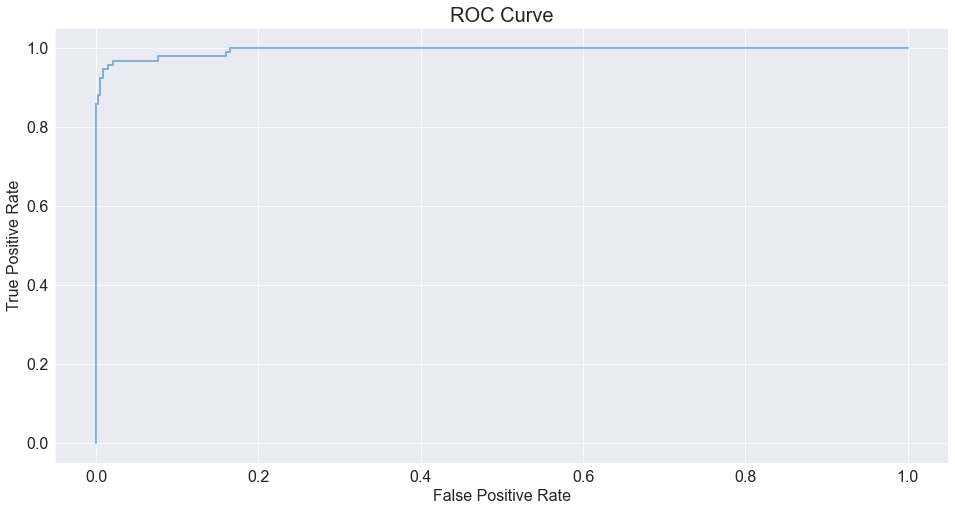

In [907]:

get_roc_curve(cat_model, test_data, plot=True);

In [908]:
print('ROC-AUC', round(roc_auc_score(DF_Sci_Fi['film_class'],DF_Sci_Fi['y_pred_best_class_catboost']),3))

ROC-AUC 0.967


In [909]:
roc_params = {'verbose': 100,
              'eval_metric': 'AUC',
              'random_seed': 42}

In [910]:
roc_model.fit(train_data, eval_set=valid_data)

Learning rate set to 0.0277
0:	test: 0.9384615	best: 0.9384615 (0)	total: 9.76ms	remaining: 9.75s
100:	test: 0.9902367	best: 0.9902367 (92)	total: 2.46s	remaining: 21.9s
200:	test: 0.9928994	best: 0.9928994 (131)	total: 4.95s	remaining: 19.7s
300:	test: 0.9934911	best: 0.9934911 (252)	total: 7.1s	remaining: 16.5s
400:	test: 0.9946746	best: 0.9946746 (375)	total: 9.32s	remaining: 13.9s
500:	test: 0.9949704	best: 0.9949704 (481)	total: 11.7s	remaining: 11.6s
600:	test: 0.9949704	best: 0.9952663 (586)	total: 13.7s	remaining: 9.12s
700:	test: 0.9949704	best: 0.9952663 (586)	total: 15.9s	remaining: 6.79s
800:	test: 0.9949704	best: 0.9952663 (586)	total: 18.1s	remaining: 4.49s
900:	test: 0.9949704	best: 0.9952663 (586)	total: 20.1s	remaining: 2.21s
999:	test: 0.9949704	best: 0.9952663 (586)	total: 22.1s	remaining: 0us

bestTest = 0.9952662722
bestIteration = 586

Shrink model to first 587 iterations.


In [911]:
roc_pred = roc_model.predict(DF_Sci_Fi[X])
print(classification_report(DF_Sci_Fi[y], roc_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       468
           1       0.96      0.96      0.96        91

    accuracy                           0.99       559
   macro avg       0.97      0.97      0.97       559
weighted avg       0.99      0.99      0.99       559



In [912]:
DF_Sci_Fi['score_catboost_roc_model'] = roc_model.predict_proba(DF_Sci_Fi[X])[:, 1]

In [913]:

thrs_roc = []

In [914]:

thrs_roc = [1] + list(DF_Sci_Fi['score_catboost_roc_model'].unique())

In [915]:
roc_result = []
for thr in thrs_roc:
    DF_Sci_Fi['y_pred_score_catboost_roc_model'] = (DF_Sci_Fi['score_catboost_roc_model'] > thr) * 1
    roc_result.append((thr,
                       f1_score(DF_Sci_Fi['film_class'], DF_Sci_Fi['y_pred_score_catboost_roc_model'])))


In [916]:
catboost_roc_model = pd.DataFrame()

In [917]:

catboost_roc_model = pd.DataFrame(roc_result, columns=['thr', 'f1'])

In [918]:

catboost_roc_model[catboost_roc_model['f1'] == catboost_roc_model['f1'].max()]

,thr,f1
356,0.560,0.961


In [919]:
DF_Sci_Fi['y_clas_catboost_roc_model'] = (DF_Sci_Fi['score_catboost_roc_model'] > 0.56).astype(int)

In [920]:
f1_score(DF_Sci_Fi['film_class'], DF_Sci_Fi['y_clas_catboost_roc_model'])

0.9560439560439561

In [921]:

DF_Sci_Fi['y_clas_catboost_roc_model'].value_counts(normalize=True)

0   0.837
1   0.163
Name: y_clas_catboost_roc_model, dtype: float64

In [935]:
DF_Sci_Fi = DF_Sci_Fi.drop('good_film_summ_catboost_best_class', axis=1)

In [936]:
DF_Sci_Fi

,title_year,gross,budget,marga,marga_coef,imdb_score,director_name,actor_1_name,num_voted_users,movie_facebook_likes,film_class,good_film_summ,year_class,score_catboost,film_class_catboost_thr_05,y_pred_score_catboost,y_pred_best_class_catboost,score_catboost_roc_model,y_pred_score_catboost_roc_model,y_clas_catboost_roc_model
0,2009.000,760505847.000,237000000.000,523505847.000,1,1,James Cameron,CCH Pounder,886204,33000,1,4,1,0.978,1,1,1,0.991,1,1
1,2012.000,73058679.000,263700000.000,-190641321.000,0,1,Andrew Stanton,Daryl Sabara,212204,24000,0,4,1,0.000,0,0,0,0.000,0,0
2,2015.000,458991599.000,250000000.000,208991599.000,0,1,Joss Whedon,Chris Hemsworth,462669,118000,0,3,1,0.006,0,0,0,0.002,0,0
3,2016.000,330249062.000,250000000.000,80249062.000,0,1,Zack Snyder,Henry Cavill,371639,197000,0,3,1,0.002,0,0,0,0.002,0,0
4,2006.000,200069408.000,209000000.000,-8930592.000,0,1,Bryan Singer,Kevin Spacey,240396,0,0,0,0,0.000,0,0,0,0.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,2015.000,83565.000,75000.000,8565.000,0,0,Brett Piper,Michelle Simone Miller,48,34,0,3,1,0.002,0,0,0,0.002,0,0
555,1962.000,43850.000,62000.000,-18150.000,0,0,Joseph Green,Virginia Leith,4752,1000,0,0,0,0.001,0,0,0,0.002,0,0
556,2014.000,2595000.000,4000000.000,-1405000.000,0,1,William Eubank,Lin Shaye,48236,10000,0,5,1,0.001,0,0,0,0.001,0,0
557,2014.000,8800.000,75000.000,-66200.000,0,0,Kirk Loudon,Barry Corbin,34,87,0,5,1,0.001,0,0,0,0.002,0,0


In [941]:
# DF_Fantasy['film_class_catboost_thr_05']  y_pred_best_class_catboost y_clas_catboost_roc_model
film_class_sum_cat = DF_Sci_Fi.reset_index().groupby('title_year')['y_clas_catboost_roc_model'].agg(['sum'])
DF_Sci_Fi = pd.merge(DF_Sci_Fi, film_class_sum_cat, how='left', on='title_year')
DF_Sci_Fi.rename(columns={'sum': 'good_film_summ_catboost_roc_model'}, inplace=True)

In [938]:

DF_Sci_Fi['year_class_catboost_thr_05'] = (DF_Sci_Fi['good_film_summ_catboost_thr_05'] > 1).astype(int)

In [940]:
DF_Sci_Fi['year_class_catboost_best'] = (DF_Sci_Fi['good_film_summ_catboost_best_class'] > 1).astype(int)

In [942]:
DF_Sci_Fi['year_class_catboost_roc_model'] = (DF_Sci_Fi['good_film_summ_catboost_roc_model'] > 1).astype(int)

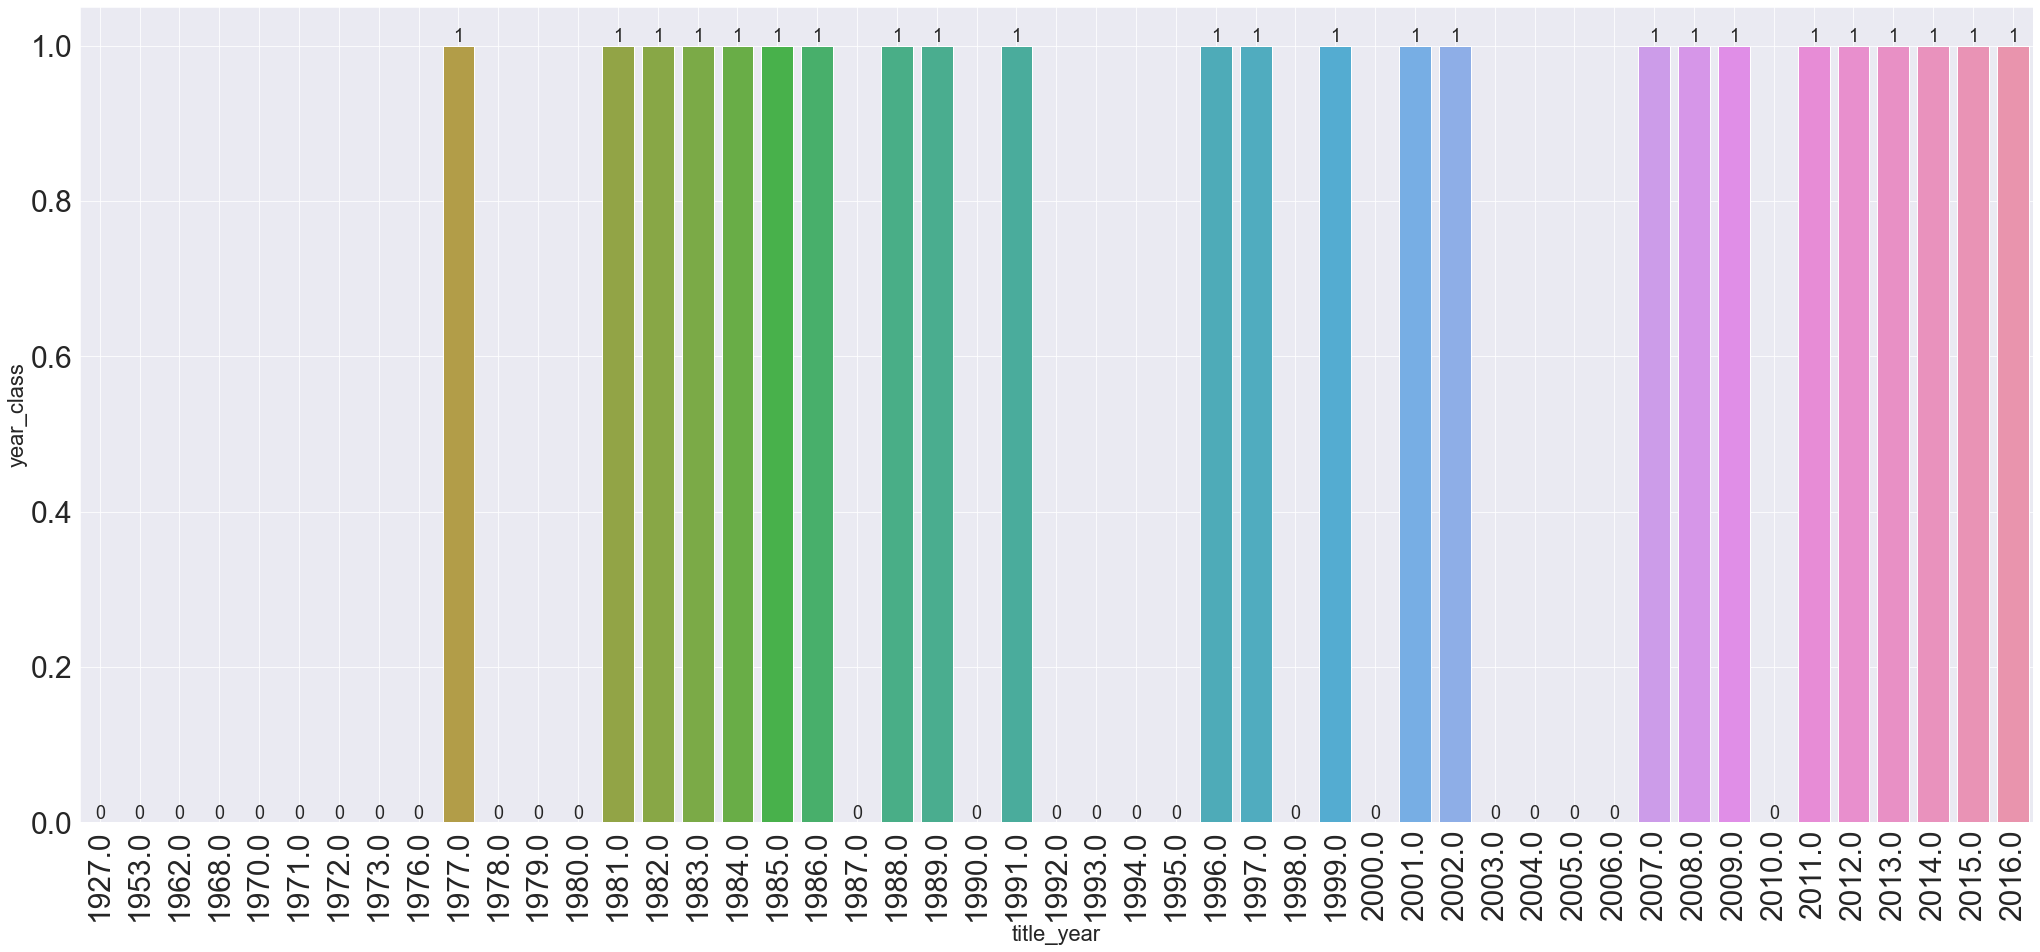

In [943]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='year_class', data=DF_Sci_Fi)
plt.grid(True)
# chart.set_title(f'{ganr}')
chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
# plt.legend(DF_Adventure['good_film_summ'], fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

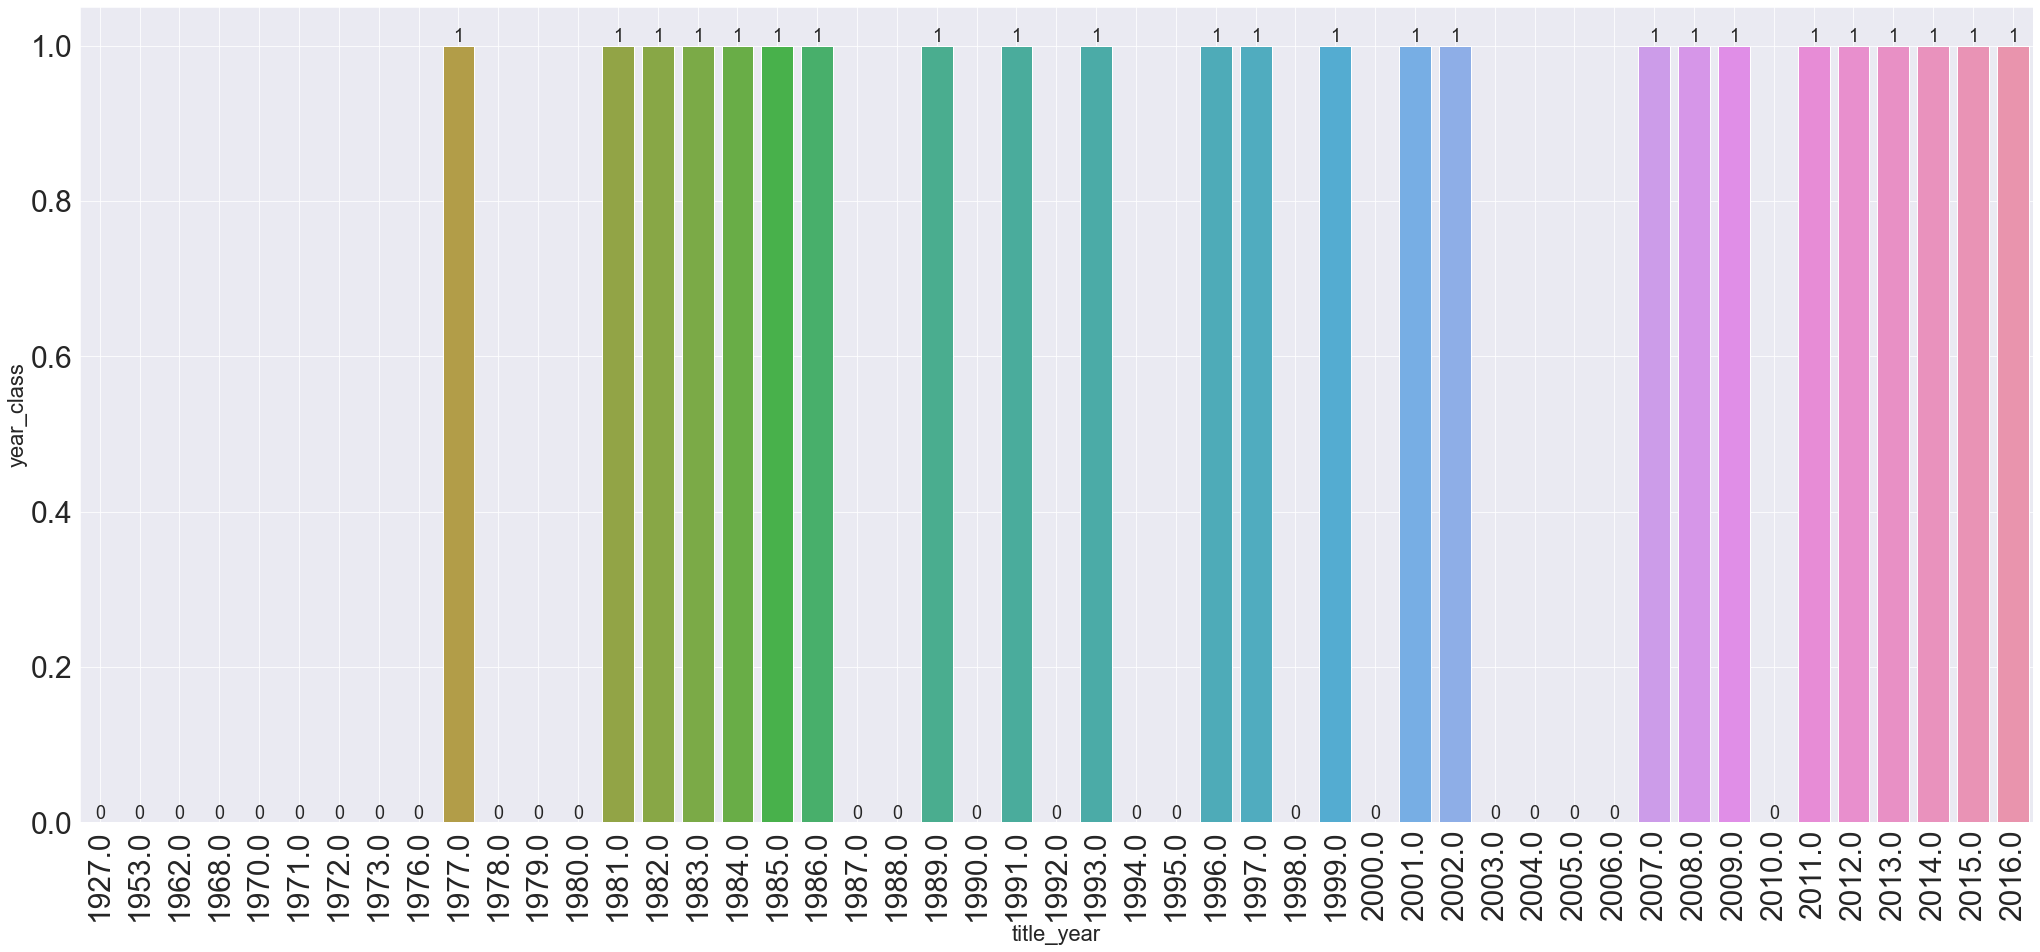

In [944]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='year_class_catboost_thr_05', data=DF_Sci_Fi)
plt.grid(True)
# chart.set_title(f'{ganr}')
chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
# plt.legend(DF_Adventure['good_film_summ'], fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

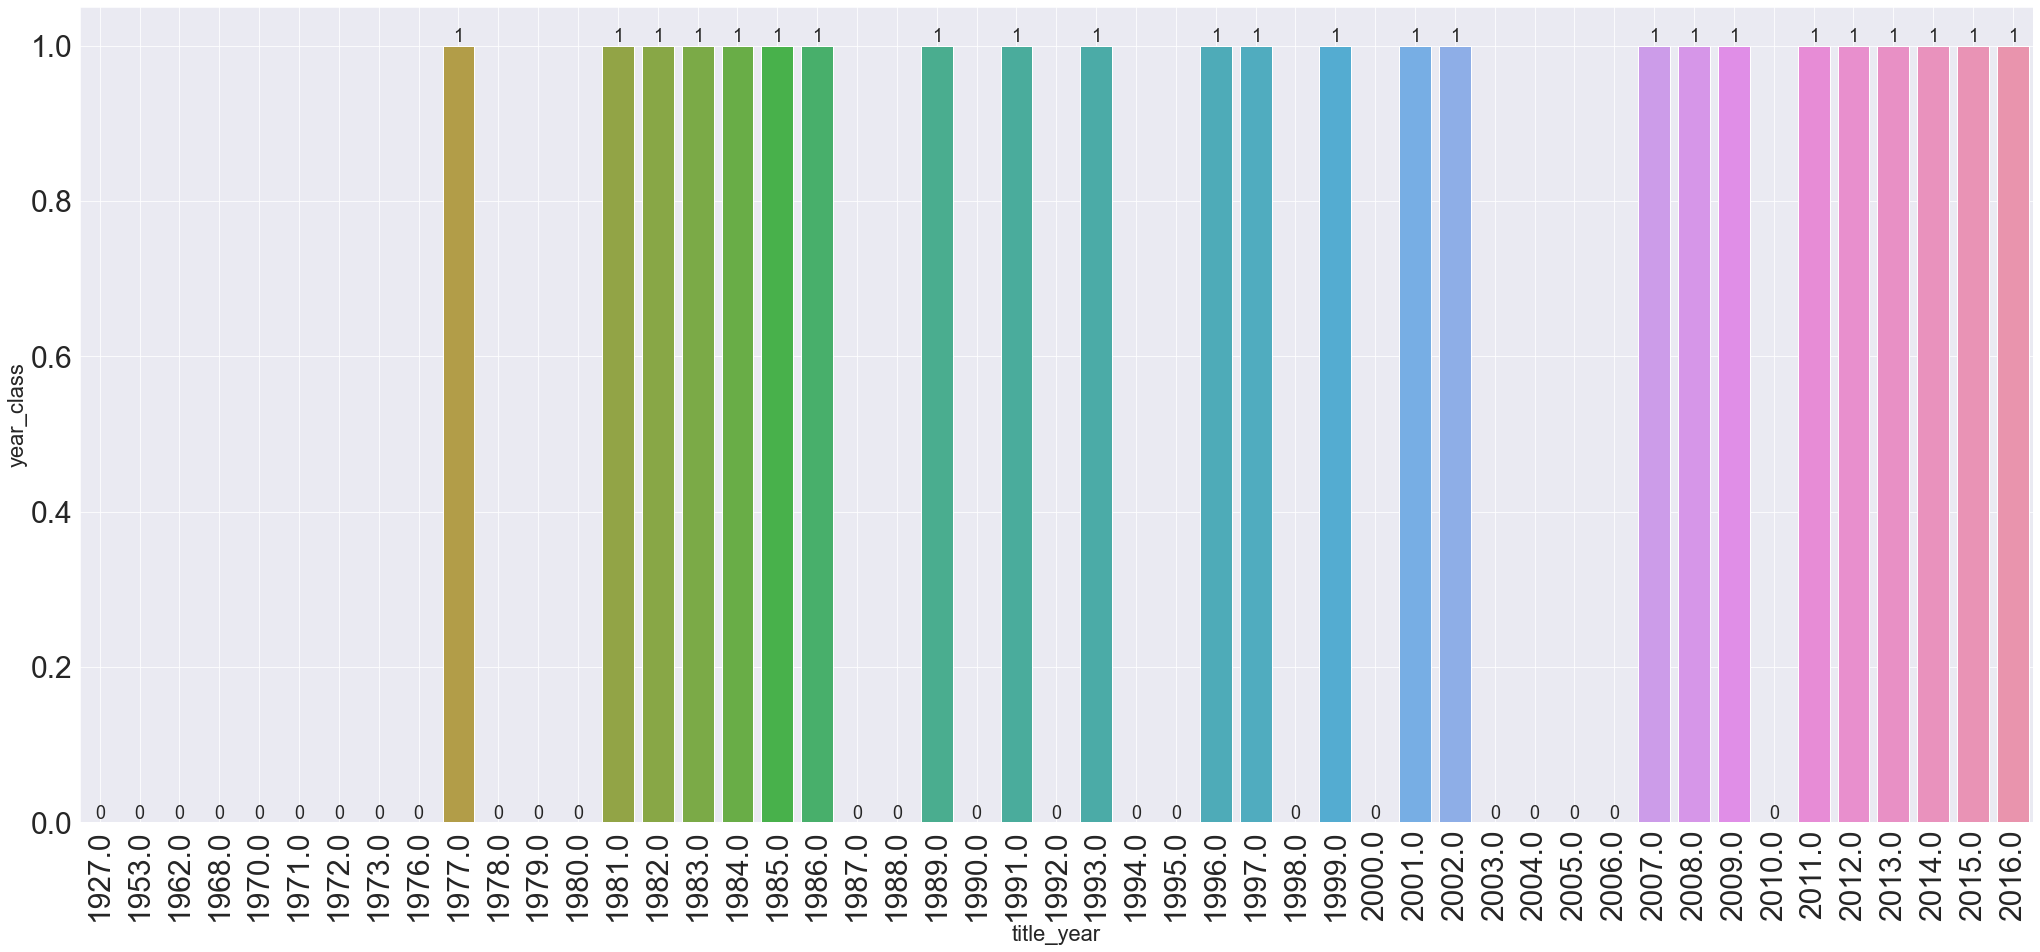

In [945]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='year_class_catboost_best', data=DF_Sci_Fi)
plt.grid(True)
# chart.set_title(f'{ganr}')
chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
# plt.legend(DF_Adventure['good_film_summ'], fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

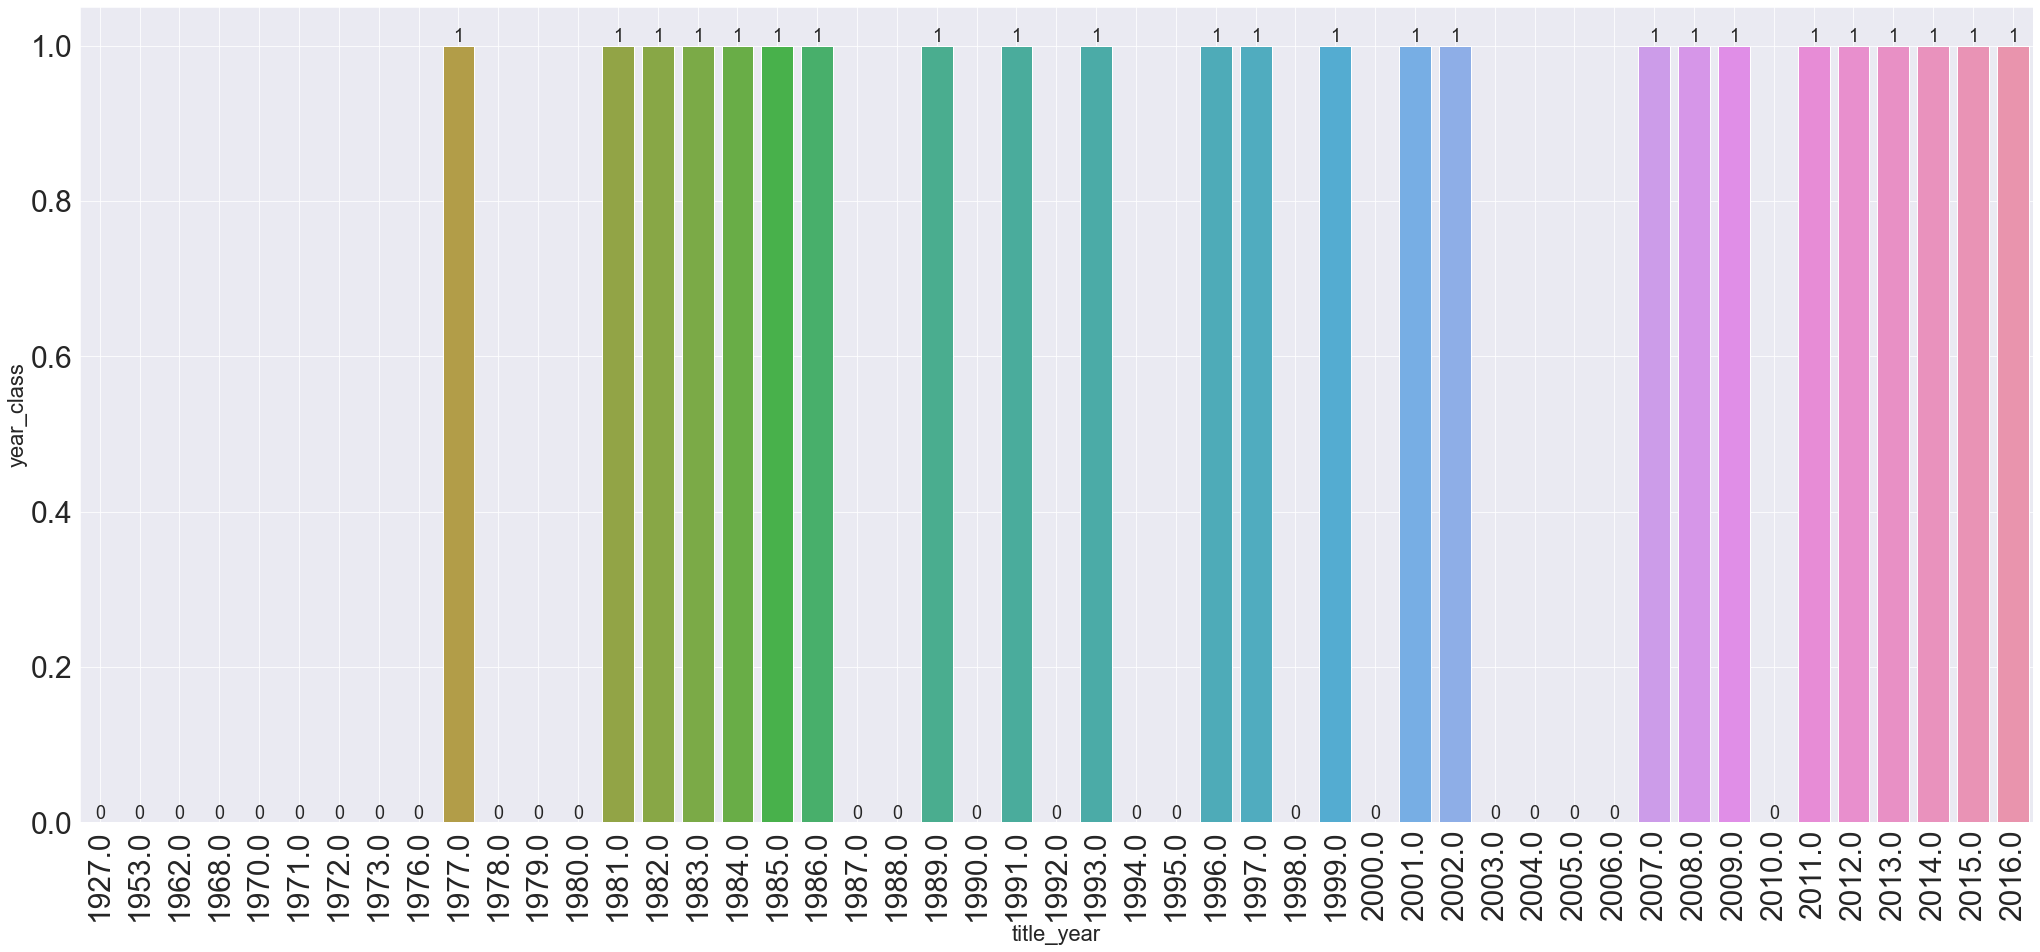

In [946]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='year_class_catboost_roc_model', data=DF_Sci_Fi)
plt.grid(True)
# chart.set_title(f'{ganr}')
chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
# plt.legend(DF_Adventure['good_film_summ'], fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [947]:
DF_Adventure['director_name']

,title_year,gross,budget,marga,marga_coef,imdb_score,director_name,actor_1_name,num_voted_users,movie_facebook_likes,film_class,good_film_summ,year_class
0,2009.000,760505847.000,237000000.000,523505847.000,1,1,James Cameron,CCH Pounder,886204,33000,1,2,1
1,2007.000,309404152.000,300000000.000,9404152.000,0,1,Gore Verbinski,Johnny Depp,471220,0,0,4,1
2,2015.000,200074175.000,245000000.000,-44925825.000,0,1,Sam Mendes,Christoph Waltz,275868,85000,0,1,0
3,2012.000,73058679.000,263700000.000,-190641321.000,0,1,Andrew Stanton,Daryl Sabara,212204,24000,0,7,1
4,2007.000,336530303.000,258000000.000,78530303.000,0,1,Sam Raimi,J.K. Simmons,383056,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,2015.000,177343675.000,135000000.000,42343675.000,0,1,Tim Johnson,Jim Parsons,70136,26000,0,1,0
889,2013.000,234903076.000,215000000.000,19903076.000,0,1,Sam Raimi,Tim Holmes,175413,60000,0,4,1
890,1975.000,1229197.000,229575.000,999622.000,1,1,Terry Gilliam,Eric Idle,382240,14000,1,2,1
891,1953.000,5000000.000,210000.000,4790000.000,1,1,Eugène Lourié,Kenneth Tobey,4812,465,1,1,0


In [948]:
phik_overview = DF_Adventure.phik_matrix()

interval columns not set, guessing: ['title_year', 'gross', 'budget', 'marga', 'marga_coef', 'imdb_score', 'num_voted_users', 'movie_facebook_likes', 'film_class', 'good_film_summ', 'year_class']


In [949]:
phik_overview['director_name'].sort_values(ascending=False)

director_name          1.000
actor_1_name           0.999
title_year             0.935
imdb_score             0.913
marga                  0.871
year_class             0.543
budget                 0.452
film_class             0.307
marga_coef             0.285
good_film_summ         0.259
gross                  0.000
num_voted_users        0.000
movie_facebook_likes   0.000
Name: director_name, dtype: float64

In [1017]:
# rcParams['figure.figsize'] = 25, 15
sns.set(rc={'figure.figsize': (27, 13), 'figure.': 72})


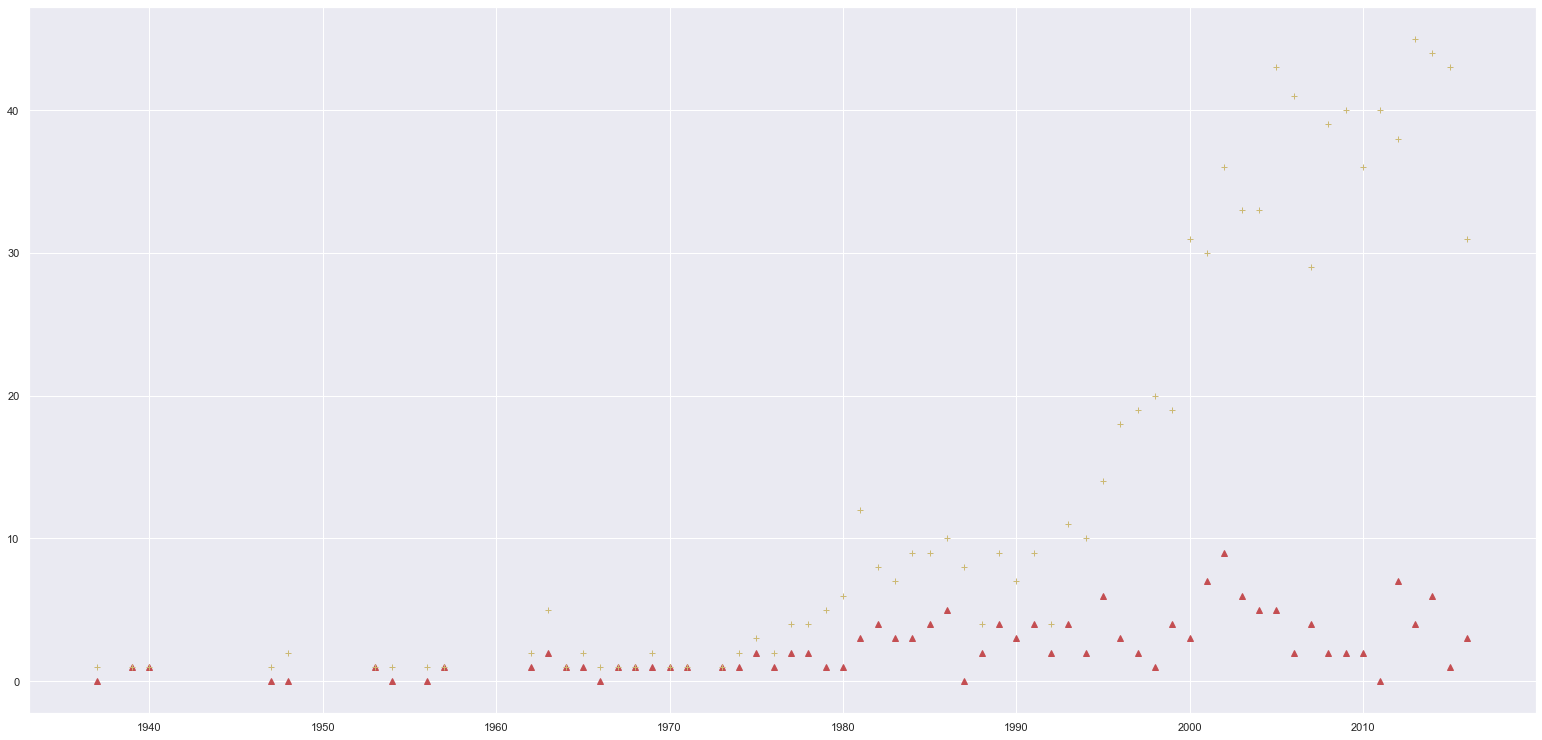

In [1018]:
# график хороших фильмов(красным) и общего количества фильмов за год(жёлтым)
plt.plot(DF_Adventure.groupby('title_year')['film_class'].agg('count').index, DF_Adventure.groupby('title_year')['film_class'].agg('sum').values, 'r^');
plt.plot(DF_Adventure.groupby('title_year')['gross'].agg('count').index, DF_Adventure.groupby('title_year')['gross'].agg('count').values, 'y+');

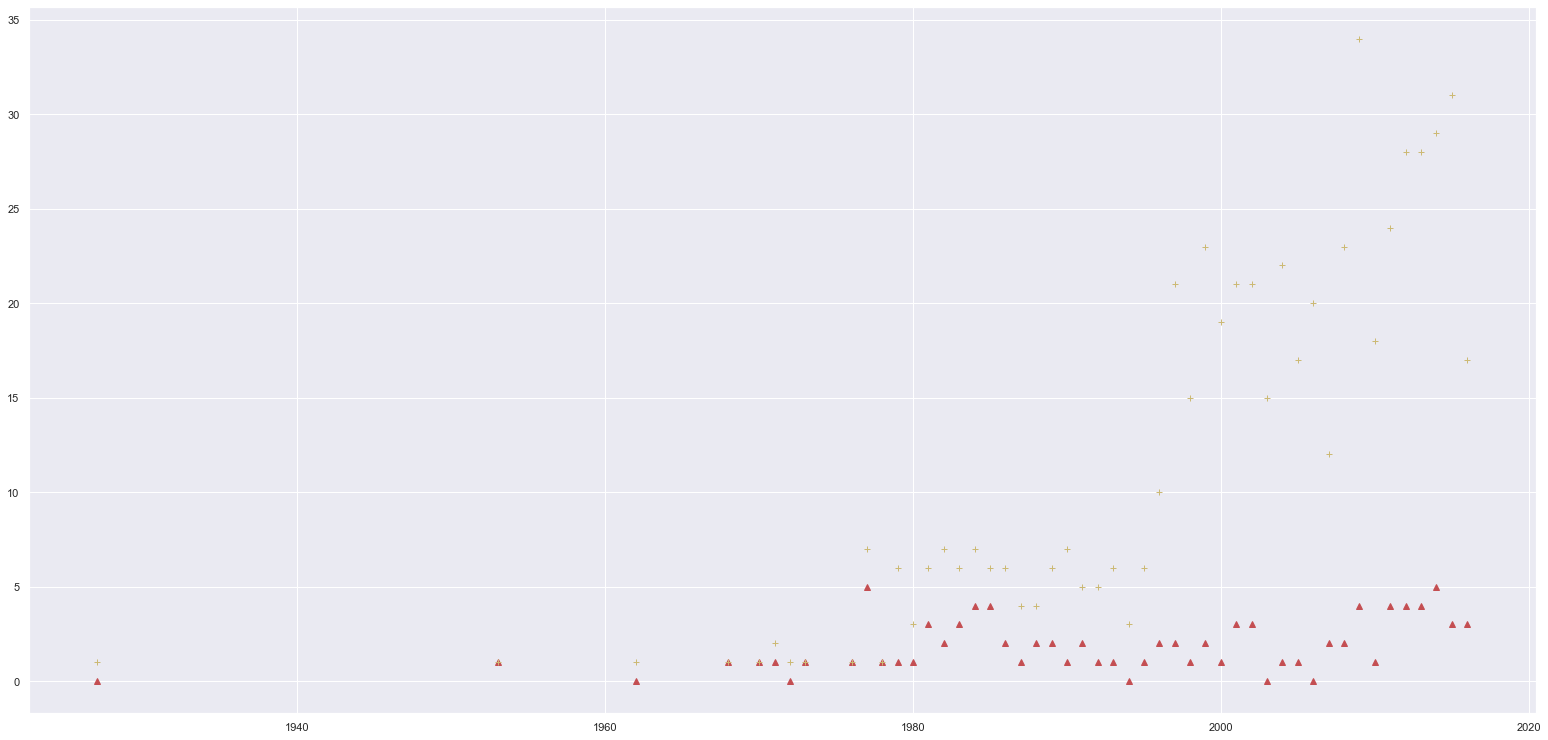

In [1019]:
# график хороших фильмов(красным) и общего количества фильмов за год(жёлтым)
plt.plot(DF_Sci_Fi.groupby('title_year')['film_class'].agg('count').index, DF_Sci_Fi.groupby('title_year')['film_class'].agg('sum').values, 'r^');
plt.plot(DF_Sci_Fi.groupby('title_year')['gross'].agg('count').index, DF_Sci_Fi.groupby('title_year')['gross'].agg('count').values, 'y+');

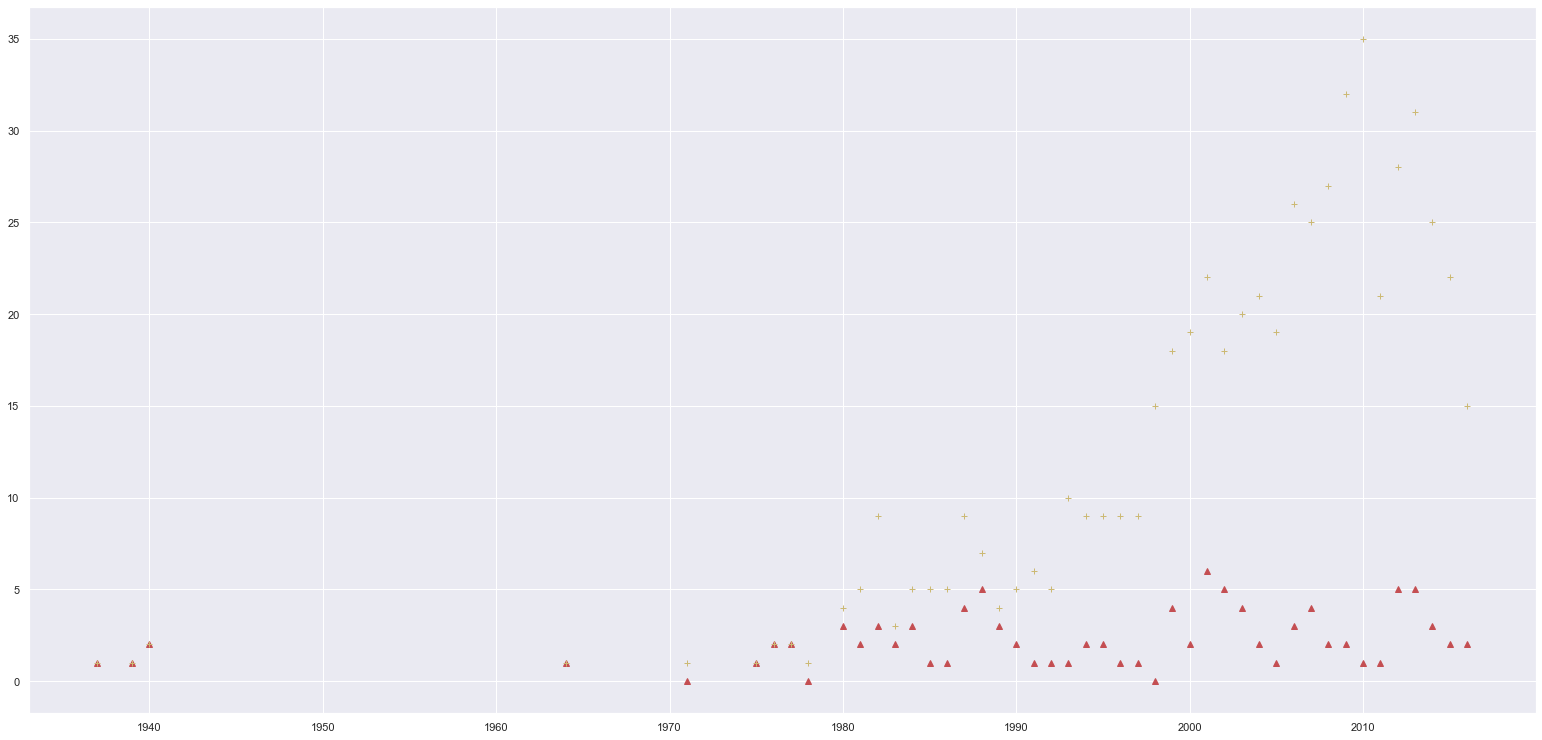

In [1020]:
# график хороших фильмов(красным) и общего количества фильмов за год(жёлтым)
plt.plot(DF_Fantasy.groupby('title_year')['film_class'].agg('count').index, DF_Fantasy.groupby('title_year')['film_class'].agg('sum').values, 'r^');
plt.plot(DF_Fantasy.groupby('title_year')['gross'].agg('count').index, DF_Fantasy.groupby('title_year')['gross'].agg('count').values, 'y+');